# Project 2 Luther


## Analysis of College to NBA Performance

In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

from bs4 import BeautifulSoup
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing, pipeline,model_selection, feature_selection, utils, linear_model
import pickle
from time import sleep
plt.style.use('fivethirtyeight')

In [2]:
years = list(range(1996,2018))
theLinks = []
for theYear in years:
    baseLink = f'https://www.basketball-reference.com/draft/NBA_{theYear}.html'
    print(f'Gathering data for the {theYear} draft')
    theLinks.append([requests.get(baseLink).text, theYear])

Gathering data for the 1996 draft
Gathering data for the 1997 draft
Gathering data for the 1998 draft
Gathering data for the 1999 draft
Gathering data for the 2000 draft
Gathering data for the 2001 draft
Gathering data for the 2002 draft
Gathering data for the 2003 draft
Gathering data for the 2004 draft
Gathering data for the 2005 draft
Gathering data for the 2006 draft
Gathering data for the 2007 draft
Gathering data for the 2008 draft
Gathering data for the 2009 draft
Gathering data for the 2010 draft
Gathering data for the 2011 draft
Gathering data for the 2012 draft
Gathering data for the 2013 draft
Gathering data for the 2014 draft
Gathering data for the 2015 draft
Gathering data for the 2016 draft
Gathering data for the 2017 draft


In [3]:
tableRows = []
soupLinks = []
for i in range(len(theLinks)):
    soupLinks.append(BeautifulSoup(theLinks[i][0],"html5lib"))
    
    table = soupLinks[i].find(class_='table_outer_container')
    rows=[row for row in table.find_all('tr')]
    tableRows.append([rows, theLinks[i][1]])

In [4]:
playerList = []
for page in tableRows:
    for row in page[0][1:]:
        add = True
        thePlayer = []
        cells = row.find_all('td')
        if cells:
            txt = cells[2]
            if txt.find('a'):
                playerList.append([txt.text, 'https://www.basketball-reference.com' + txt.find('a')['href'], page[1]])


###### NBA Table Structure

Age | Team | League | Pos | GP | GS | Min | FG | FGA | FG% | 3P | 3PA | 3P% | 2P | 2PA | 2P% | EFG% | FT | FTA | ORDB | DRB | TRB | AST | STL | BLK | TOV | FOULS | PTS

###### CBB Table Structure


School | Conf | GP | GS | MP | FG | FGA | FG% | 2P | 2PA | 2P% | 3P | 3PA | 3P% | FT | FTA | FT% | ORDB | DRB | TRB | AST | STL | BLK | TOV | FOULS | PTS | *blank cell* | SOS

In [83]:
with open("basketball_data.pkl", 'rb') as picklefile: 
    oldData = pickle.load(picklefile)

picklePlayers = []
for row in oldData:
    picklePlayers.append(row[1])
    
playerStats = oldData

In [6]:
# playerStats = oldData
# myCount = 1
# for player in playerList:
#     toAdd = False
#     cbbFound = False
#     print(f'Gathering data for player {myCount} out of {len(playerList)}')
#     myCount+=1
#     if player[1] not in picklePlayers:
#         theRequest = requests.get(player[1]).text
#         table = BeautifulSoup(theRequest,"html5lib").find('table')
#         if table:
#             rookieYear = table.find_all('tr')[1]
#             rkStats = [x.text for x in rookieYear.find_all('td')]
#             for links in BeautifulSoup(theRequest,"html5lib").find_all('a'):
#                 if links.has_attr('href'):
#                     if 'cbb/players' in links['href']:
#                         cbbFound = True
#                         cbbLink = links['href']
#             cbbRequest = requests.get(cbbLink).text
#             cbbSoup = BeautifulSoup(cbbRequest,"html5lib")
#             cbbtable = cbbSoup.find('table')
#             if cbbtable:
#                 summary = cbbSoup.find(class_='players').find_all('p')
#                 vitalsLoc = -1
#                 for i in range(len(summary)):
#                     if 'Position' in summary[i].text:
#                         vitalsLoc = i + 1
#                 if vitalsLoc == -1:
#                     vitalsLoc = 0
#                 vitals = (summary[vitalsLoc].text).split(u'\xa0')
#                 toAdd = False
#                 if ',' in vitals[0]:
#                     toAdd = True
#                     heightSplit = vitals[0][:-1].split('-')
#                     height = float(heightSplit[0]) * 12 + float(heightSplit[1])
#                     weight = float(vitals[1][:-2])
#                 else:
#                     if len(vitals) > 1:
#                         print('Player')
#                         if 'cm' in vitals[1]:
#                             toAdd = True
#                             heightSplit = vitals[0].split('-')
#                             height = float(heightSplit[0]) * 12 + float(heightSplit[1])
#                         elif 'kg' in vitals[1]:
#                             toAdd = True
#                             weight = float(vitals[0][:-2])                        
#                 tableRows = cbbtable.find_all('tr')
#                 for i in range(1,len(tableRows)):
#                     allHeaders = tableRows[i].find_all('th')
#                     for head in allHeaders:
#                         if head.text == 'Career':
#                             finalSeason = i-1
#                 finalSeasonStats = [x.text for x in tableRows[finalSeason].find_all('td')]
#                 schoolLink = 'https://www.sports-reference.com' + tableRows[finalSeason].find_all('td')[0].find('a')['href']
#                 relevantStats = finalSeasonStats[4:26]+[finalSeasonStats[27], height,weight,schoolLink]
#                 if toAdd and cbbFound:
#                     playerStats.append(player + rkStats + relevantStats)
#                     with open('basketball_data.pkl', 'wb') as picklefile:
#                         pickle.dump(playerStats, picklefile)
#                 sleep(0.5)

In [7]:
columns = ['player', 'playerlink', 'draftyear', 'age','team','league','pos','gp','gs','min','fg','fga', 
           'fgp','3p','3pa','3pp','2p','2pa','2pp','efgp','ft','fta','ftp','orb','drb',
           'trb','ast','stl','blk','tov','fouls','pts']
for i in range(3,len(columns)):
    columns[i] = 'rook' + columns[i]
    
cbbTable = 'MP | FG | FGA | FG% | 2P | 2PA | 2P% | 3P | 3PA | 3P% | FT | FTA | FT% | ORDB | DRB | TRB | AST | STL | BLK | TOV | FOULS | PTS | SOS'
cbbCols = cbbTable.split(' | ')
updCols = [('col' + x.lower()).replace('%','p') for x in cbbCols]
columns.extend(updCols + ['height','weight','teamlink'])

In [85]:
playerDf = pd.DataFrame(playerStats,columns=columns).drop_duplicates()

In [9]:
collegeTeam = playerDf.teamlink.copy().unique()

In [10]:
with open("teamStats.pkl", 'rb') as picklefile: 
    oldData = pickle.load(picklefile)
    
allTeams = oldData

In [11]:
# allTeams = []
# myCount = 0
# for link in collegeTeam:
#     myCount+=1
#     print(f'Gathering data for team {myCount} out of {len(collegeTeam)}')
#     teamReq = requests.get(link).text
#     teamSoup = BeautifulSoup(teamReq,'html5lib')
#     teamStatsTable = (teamSoup.find_all('table'))[1]
#     tableRows = teamStatsTable.find_all('tr')
#     teamStatRow = tableRows[1].find_all('td')
#     games = float(teamStatRow[0].text)
#     teamStats = [link]
#     for val in teamStatRow[2:-1]:
#         if val.text=='':
#             teamStats.append(0)
#         elif float(val.text) < 1:
#             teamStats.append(float(val.text))
#         else:
#             teamStats.append(float(val.text)/games)

#     oppStatRow = tableRows[3].find_all('td')
#     for val in oppStatRow[2:-1]:
#         if val.text=='':
#             teamStats.append('BLANK')
#         elif float(val.text) < 1:
#             teamStats.append(float(val.text))
#         else:
#             teamStats.append(float(val.text)/games)
#     allTeams.append(teamStats)
#     with open('teamStats.pkl', 'wb') as picklefile:
#         pickle.dump(allTeams, picklefile)
#     sleep(.5)

In [12]:
teamCols = 'FG|FGA|FG%|2P|2PA|2P%|3P|3PA|3P%|FT|FTA|FT%|ORB|DRB|TRB|AST|STL|BLK|TOV|PF|PTS'

tmCols = ['team' + x.lower().replace('%','p') for x in teamCols.split('|')]
oppCols = ['opp' + x.lower().replace('%','p') for x in teamCols.split('|')]
teamStatCols = ['teamlink'] + tmCols + oppCols

In [13]:
teamDf = pd.DataFrame(allTeams,columns=teamStatCols)


###### John Hollinger's gamescore to serve as a proxy for season performance
Game Score = Points Scored + (0.4 x Field Goals) – (0.7 x Field Goal Attempts) – (0.4 x (Free Throw Attempts – Free Throws)) + (0.7 x Offensive Rebounds) + (0.3 x Defensive Rebounds) + Steals + (0.7 x Assists) + (0.7 x Blocks) – (0.4 x Personal Fouls) – Turnovers

In [14]:
def convert_to_float (num):
    try:
        return float(num)
    except ValueError:
        if num=='' or num=='BLANK':
            return -123456
        else:
            return(num)

In [15]:
playerTeamDf = pd.merge(playerDf,teamDf,how='left',on='teamlink').copy()

In [16]:
for col in playerTeamDf.columns:
    playerTeamDf[col] = playerTeamDf[col].apply(convert_to_float)

for col in playerTeamDf.columns[7:-1]:
    if col != 'teamlink':
        if col[-2:] == 'pp' or col[-2:] == 'tp':
            playerTeamDf.loc[playerTeamDf[col]==-123456,col] = 0
        else:
            theAvg = playerTeamDf[playerTeamDf[col] != -123456][col].mean()
            playerTeamDf.loc[playerTeamDf[col]==-123456,col] = theAvg

In [17]:
playerTeamDf['gamescore'] = playerTeamDf.rookpts + .4* playerTeamDf.rookfg - .7*playerTeamDf.rookfga - \
                        (.4*(playerTeamDf.rookfta-playerTeamDf.rookft)) + .7*playerTeamDf.rookorb+ \
                        .3*playerTeamDf.rookdrb+playerTeamDf.rookstl+.7*playerTeamDf.rookast +  \
                        .7*playerTeamDf.rookblk -.4 *playerTeamDf.rookfouls - playerTeamDf.rooktov

In [18]:
playerTeamDf.sort_values('gamescore',ascending=False)

player  \
488            Blake Griffin   
38                Tim Duncan   
793              Ben Simmons   
0              Allen Iverson   
330               Chris Paul   
754       Karl-Anthony Towns   
124              Elton Brand   
491             Tyreke Evans   
713              Joel Embiid   
125            Steve Francis   
576             Kyrie Irving   
493            Stephen Curry   
626           Damian Lillard   
80              Vince Carter   
847         Donovan Mitchell   
530                John Wall   
271          Carmelo Anthony   
446             Derrick Rose   
2        Shareef Abdur-Rahim   
366              Brandon Roy   
405             Kevin Durant   
681  Michael Carter-Williams   
84               Paul Pierce   
127               Lamar Odom   
621            Anthony Davis   
7              Kerry Kittles   
3            Stephon Marbury   
5             Antoine Walker   
39            Keith Van Horn   
300             Emeka Okafor   
..                       ...   
828            Georges Niang   
708              Erik Murphy   
566           Jarvis Varnado   
600            Justin Harper   
507            Byron Mullens   
481            Patrick Ewing   
563             Andy Rautins   
443         Demetris Nichols   
106          DeMarco Johnson   
821            Diamond Stone   
856              Tyler Lydon   
441            JamesOn Curry   
355                Von Wafer   
668      Darius Johnson-Odom   
361               Alex Acker   
827          Michael Gbinije   
665             Kevin Murphy   
53                Paul Grant   
153            A.J. Bramlett   
478              Sonny Weems   
283                Troy Bell   
562         Darington Hobson   
569               Gani Lawal   
105               Casey Shaw   
636              Royce White   
109              Miles Simon   
559           Dexter Pittman   
560         Hassan Whiteside   
829               Ben Bentil   
716            Julius Randle   

                                            playerlink  draftyear  rookage  \
488  https://www.basketball-reference.com/players/g...     2009.0     21.0   
38   https://www.basketball-reference.com/players/d...     1997.0     21.0   
793  https://www.basketball-reference.com/players/s...     2016.0     21.0   
0    https://www.basketball-reference.com/players/i...     1996.0     21.0   
330  https://www.basketball-reference.com/players/p...     2005.0     20.0   
754  https://www.basketball-reference.com/players/t...     2015.0     20.0   
124  https://www.basketball-reference.com/players/b...     1999.0     20.0   
491  https://www.basketball-reference.com/players/e...     2009.0     20.0   
713  https://www.basketball-reference.com/players/e...     2014.0     22.0   
125  https://www.basketball-reference.com/players/f...     1999.0     22.0   
576  https://www.basketball-reference.com/players/i...     2011.0     19.0   
493  https://www.basketball-reference.com/players/c...     2009.0     21.0   
626  https://www.basketball-reference.com/players/l...     2012.0     22.0   
80   https://www.basketball-reference.com/players/c...     1998.0     22.0   
847  https://www.basketball-reference.com/players/m...     2017.0     21.0   
530  https://www.basketball-reference.com/players/w...     2010.0     20.0   
271  https://www.basketball-reference.com/players/a...     2003.0     19.0   
446  https://www.basketball-reference.com/players/r...     2008.0     20.0   
2    https://www.basketball-reference.com/players/a...     1996.0     20.0   
366  https://www.basketball-reference.com/players/r...     2006.0     22.0   
405  https://www.basketball-reference.com/players/d...     2007.0     19.0   
681  https://www.basketball-reference.com/players/c...     2013.0     22.0   
84   https://www.basketball-reference.com/players/p...     1998.0     21.0   
127  https://www.basketball-reference.com/players/o...     1999.0     20.0   
621  https://www.basketball-reference.com/players/d...     2012.0     19.0   
7    http

In [19]:
xCols = ['colmp', 'colfg', 'colfga', 'colfgp', 'col2p', 'col2pa', 'col2pp',
       'col3p', 'col3pa', 'col3pp', 'colft', 'colfta', 'colftp', 'coltrb',
        'colast', 'colstl', 'colblk', 'coltov', 'colfouls',
       'colpts', 'colsos','height','weight'] + teamStatCols[1:]

yCols = ['rookfgp','rook3pp', 'rook2pp', 'rookefgp','rookftp', 'rooktrb',
        'rookast', 'rookstl', 'rookblk', 'rooktov', 'rookpts','gamescore']

predictionCols = ['pred_' + x for x in yCols]

In [20]:
plotDf = playerTeamDf[playerTeamDf.rookmin > 10].copy()
plotDf = plotDf[plotDf.colmp > 10]

### Model Selection

###### K-Best Feautures

In [88]:
select_pipe = pipeline.Pipeline(
    [("select",
      feature_selection.SelectKBest(
          score_func=feature_selection.f_regression, k=3)),
     ("model", linear_model.LinearRegression())])

In [24]:
df2017Kbest = plotDf[plotDf.draftyear == 2017][['player'] + xCols + yCols].copy()
for cols in yCols:
    df2017Kbest['pred_' + cols] = 0

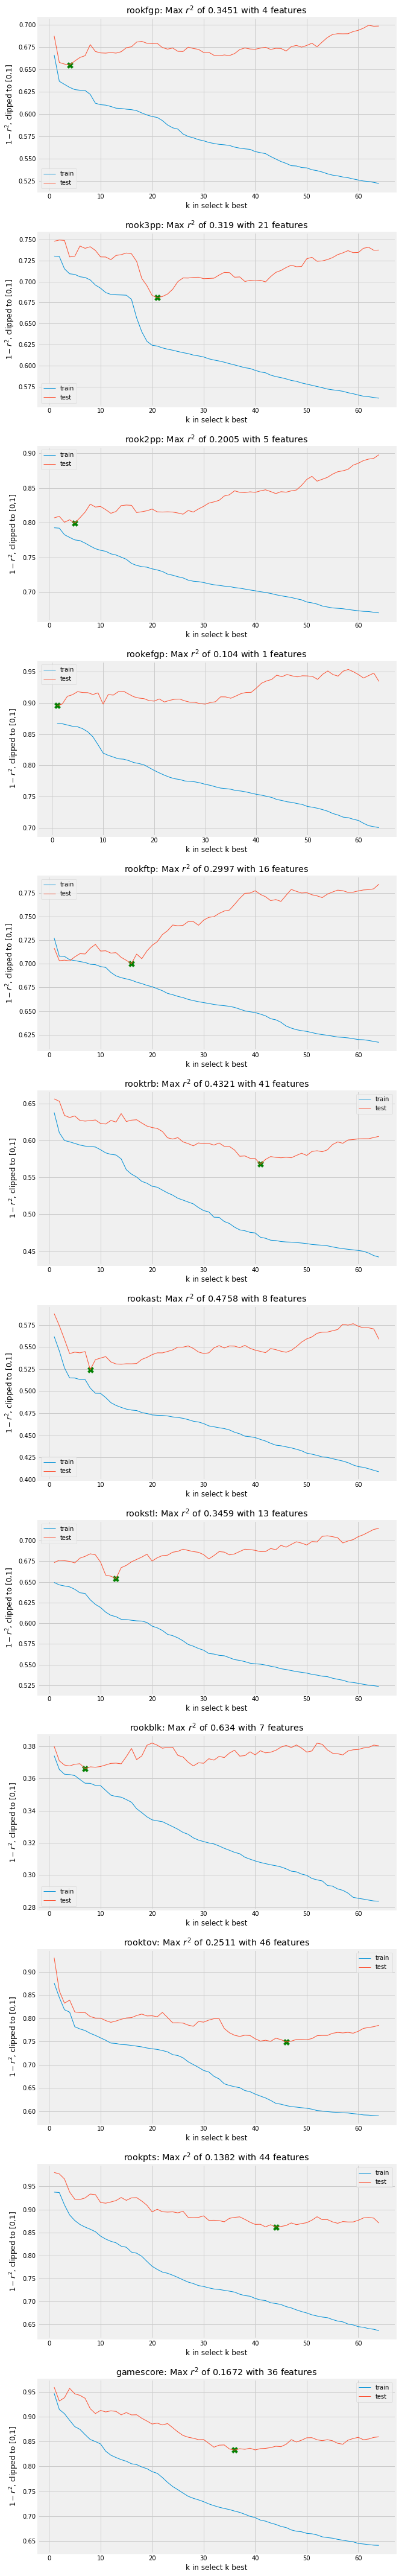

In [26]:
trainDf = utils.shuffle(plotDf[plotDf.draftyear < 2017][['player'] + xCols + yCols].copy())

fig, axes = plt.subplots(nrows=len(yCols),ncols=1, figsize=(10, len(yCols)*5))
plt.tight_layout(pad=5)
fig.set_facecolor('white')
kBestR2 =[]
kBestPlots = []
kBestModels = []
for i,ax in enumerate(axes.flat):
    curr_i = yCols[i]
    train_scores = []
    test_scores = []
    num_fs = range(1, len(xCols), 1)
    theMax=-10
    nFeatures = 0
    for i, num_f in enumerate(num_fs):
        models = []
        select_pipe.set_params(select__k=num_f)
        cv_result = model_selection.cross_validate(
            select_pipe, X=trainDf[xCols], y=trainDf[curr_i], cv=10, return_train_score=True)
        train_scores.append(np.mean(cv_result['train_score']))
        test_scores.append(np.mean(cv_result['test_score']))
        if np.mean(cv_result['test_score']) > theMax:
            theMax = np.mean(cv_result['test_score'])
            nFeatures = num_f
    select_pipe.set_params(select__k=nFeatures)
    select_pipe.fit(trainDf[xCols],trainDf[curr_i])
    theOrder = np.argsort(select_pipe.named_steps["select"].pvalues_)
    theIndex = [theOrder[num] for num in range(nFeatures)]
    selectedFeatures = list(np.array(xCols)[theIndex])
    select_pipe.fit(trainDf[selectedFeatures],trainDf[curr_i])
    df2017Kbest['pred_' + curr_i] = select_pipe.named_steps["model"].predict(df2017Kbest[selectedFeatures])
    kBestModels.append([pickle.dumps(select_pipe.named_steps["model"]), selectedFeatures])
    kBestR2.append([curr_i,theMax,selectedFeatures])
    ax.plot(num_fs, 1 - np.array(train_scores), label="train",linewidth=1)
    ax.plot(num_fs, 1 - np.maximum(test_scores, 0), label="test",linewidth=1)
    ax.scatter(nFeatures,1 - theMax, s=100,c='green',marker='X')
    ax.set_xlabel("k in select k best")
    ax.set_ylabel("$1-r^2$, clipped to [0,1]")
    ax.legend()
    ax.set_title(f'{curr_i}: Max $r^2$ of {round(theMax,4)} with {nFeatures} features', color='black')
    kBestPlots.append([num_fs,1 - np.array(train_scores),1 - np.maximum(test_scores, 0)])

#### Regularization Methods

###### Ridge

In [27]:
df2017Ridge = plotDf[plotDf.draftyear == 2017][['player'] + xCols + yCols].copy()
for cols in yCols:
    df2017Ridge['pred_' + cols] = 0

In [89]:
ridge_pipe = pipeline.Pipeline([
    ("imp", preprocessing.Imputer()), 
    ("std", preprocessing.MinMaxScaler()),
    ("model", linear_model.Ridge())
])
k_folds = model_selection.KFold(n_splits=10, shuffle=True)

Creating model for rookfgp, 11 models remaining
Creating model for rook3pp, 10 models remaining
Creating model for rook2pp, 9 models remaining
Creating model for rookefgp, 8 models remaining
Creating model for rookftp, 7 models remaining
Creating model for rooktrb, 6 models remaining
Creating model for rookast, 5 models remaining
Creating model for rookstl, 4 models remaining
Creating model for rookblk, 3 models remaining
Creating model for rooktov, 2 models remaining
Creating model for rookpts, 1 models remaining
Creating model for gamescore, 0 models remaining


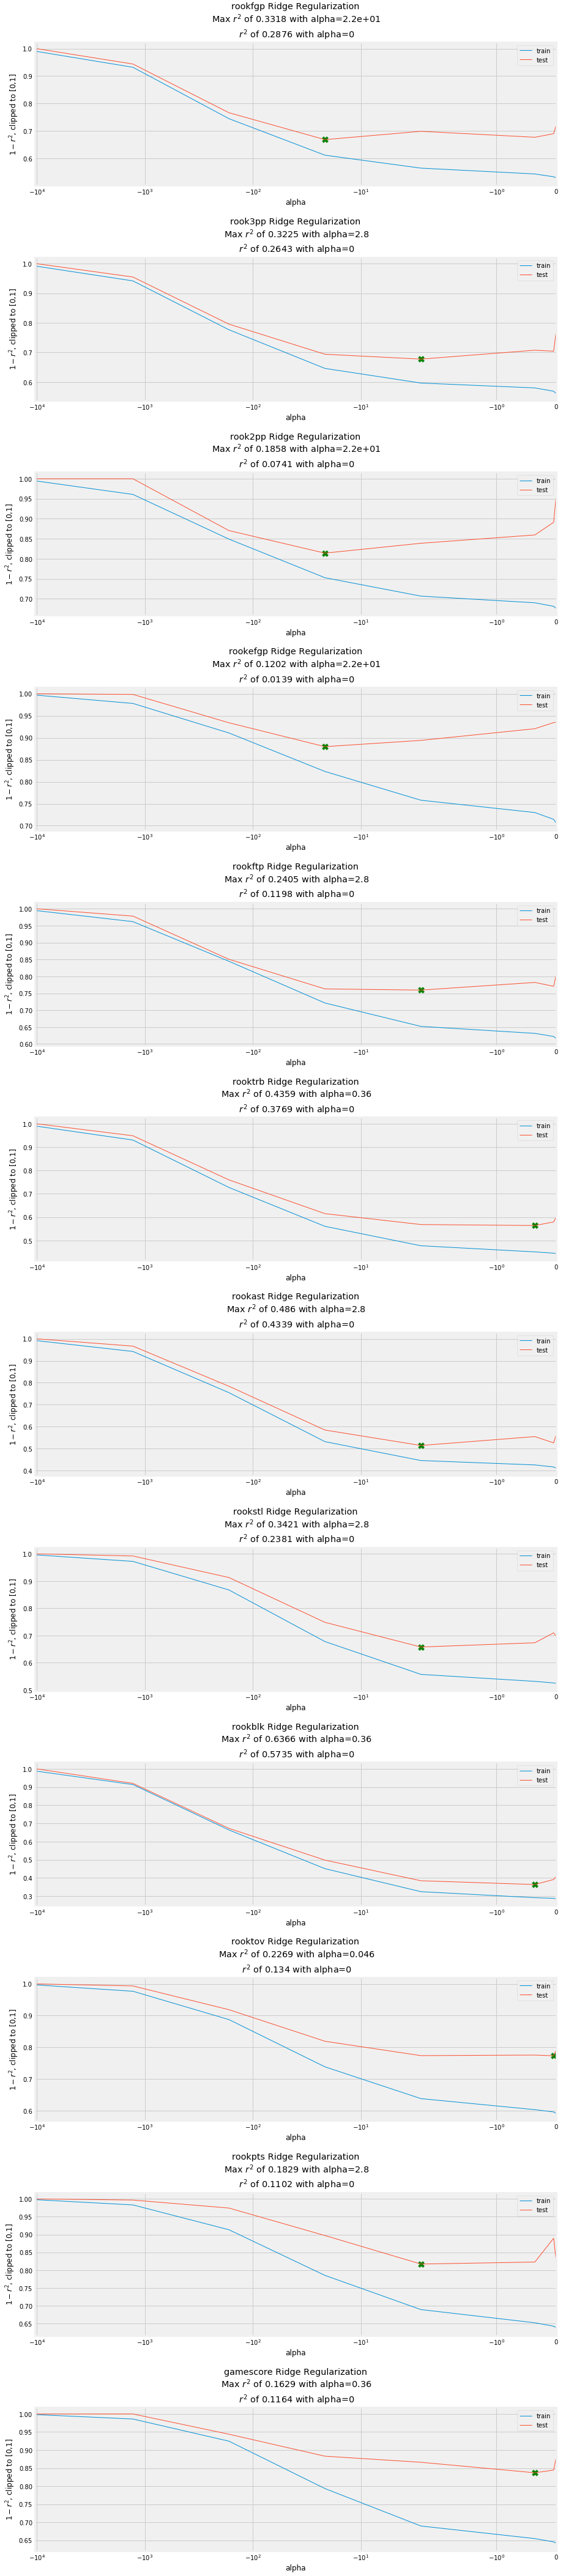

In [29]:
fig,axes = plt.subplots(nrows=len(yCols),ncols=1, figsize=(15, len(yCols)*5))
plt.tight_layout(pad=10)
fig.set_facecolor('white')

alphas = list(np.logspace(-4,4,num=10))
alphas.extend([0])
alphas.sort()
alphas = np.array(alphas)
ridgeR2=[]
ridgePlots = []
ridgeModels = []
for i,ax in enumerate(axes.flat):
    curr_i = yCols[i]
    print(f'Creating model for {curr_i}, {len(yCols) - i - 1} models remaining')
    train_scores = []
    test_scores = []
    theMax=-10
    theAlpha = 0
    zeroR=0
    for alpha in alphas:
        ridge_pipe.set_params(ridge__alpha=alpha)
        cv_result = model_selection.cross_validate(
            ridge_pipe, X=trainDf[xCols], y=trainDf[curr_i], cv=k_folds, return_train_score=True)
        train_scores.append(np.mean(cv_result['train_score']))
        test_scores.append(np.mean(cv_result['test_score']))
        if np.mean(cv_result['test_score']) > theMax:
            theMax = np.mean(cv_result['test_score'])
            theAlpha = alpha
        if alpha==0:
            zeroR = np.mean(cv_result['test_score'])
    ridgeR2.append([curr_i,theMax])
    
    ridge_pipe.set_params(ridge__alpha=theAlpha)
    ridge_pipe.fit(trainDf[xCols],trainDf[curr_i])
    df2017Ridge['pred_' + curr_i] = ridge_pipe.predict(df2017Ridge[xCols])
    ridgeModels.append(pickle.dumps(ridge_pipe))
    
    ax.plot(-alphas, 1 - np.array(train_scores), label="train",linewidth=1)
    ax.plot(-alphas, 1 - np.maximum(test_scores, 0), label="test",linewidth=1)
    ax.scatter(-theAlpha,1 - theMax, s=100,c='green',marker='X')
    ax.set_xlabel("alpha")
    ax.set_ylabel("$1-r^2$, clipped to [0,1]")
    ax.legend()
    ax.set_xlim(right=0)
    ax.set_title(f'{curr_i} Ridge Regularization\n Max $r^2$ of {round(theMax,4)} with alpha={theAlpha:.2} \n $r^2$ of {round(zeroR,4)} with alpha=0')
    ax.set_xscale('symlog')
    ridgePlots.append([-alphas,1 - np.array(train_scores), 1 - np.maximum(test_scores, 0)])

###### Lasso

In [30]:
df2017Lasso = plotDf[plotDf.draftyear == 2017][['player'] + xCols + yCols].copy()
for cols in yCols:
    df2017Lasso['pred_' + cols] = 0

In [90]:
lasso_pipe = pipeline.Pipeline([
    ("imp", preprocessing.Imputer()), 
    ("std", preprocessing.MinMaxScaler()),
    ("model", linear_model.Lasso())
])

Creating model for rookfgp, 11 models remaining
Creating model for rook3pp, 10 models remaining
Creating model for rook2pp, 9 models remaining
Creating model for rookefgp, 8 models remaining
Creating model for rookftp, 7 models remaining
Creating model for rooktrb, 6 models remaining
Creating model for rookast, 5 models remaining
Creating model for rookstl, 4 models remaining
Creating model for rookblk, 3 models remaining
Creating model for rooktov, 2 models remaining
Creating model for rookpts, 1 models remaining
Creating model for gamescore, 0 models remaining


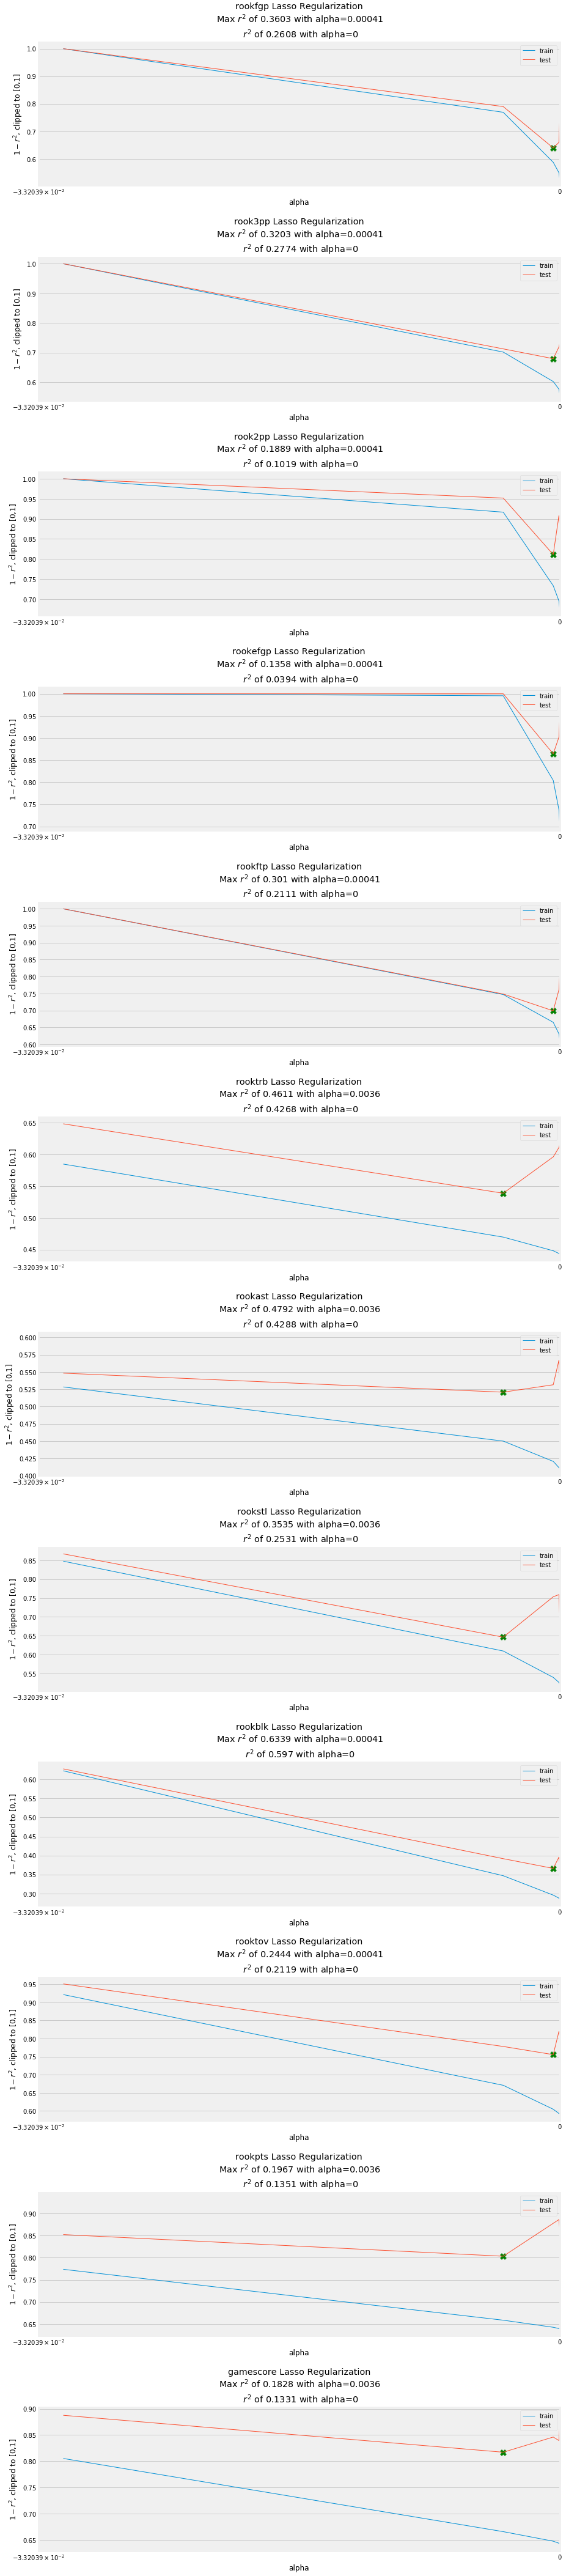

In [32]:
fig, axes = plt.subplots(nrows=len(yCols),ncols=1, figsize=(15, len(yCols)*5))
plt.tight_layout(pad=10)
fig.set_facecolor('white')

alphas = list(np.logspace(-10,-1.5,num=10))
alphas.extend([0])
alphas.sort()
alphas = np.array(alphas)
lassoR2 = []
lassoPlots = []
lassoModels = []
for i,ax in enumerate(axes.flat):
    curr_i = yCols[i]
    print(f'Creating model for {curr_i}, {len(yCols) - i - 1} models remaining')
    train_scores = []
    test_scores = []
    theMax=-10
    theAlpha = 0
    zeroR=0
#     x_train, x_test, y_train, y_test = model_selection.train_test_split(trainDf[xCols],trainDf[curr_i])
    for alpha in alphas:
        lasso_pipe.set_params(lasso__alpha=alpha)
        est = linear_model.Lasso(alpha=alpha, normalize=True)
        cv_result = model_selection.cross_validate(
            lasso_pipe, X=trainDf[xCols], y=trainDf[curr_i], cv=k_folds, return_train_score=True)
        train_scores.append(np.mean(cv_result['train_score']))
        test_scores.append(np.mean(cv_result['test_score']))
        if np.mean(cv_result['test_score']) > theMax:
            theMax = np.mean(cv_result['test_score'])
            theAlpha = alpha
        if alpha==0:
            zeroR = np.mean(cv_result['test_score'])
    lassoR2.append([curr_i,theMax])
    
#     est = linear_model.Lasso(alpha=theAlpha, normalize=True)
#     df2017Lasso['pred_' + curr_i] = est.fit(x_train,y_train).predict(df2017Lasso[xCols])
#     lassoModels.append(pickle.dumps(est.fit(x_train,y_train)))
    
    lasso_pipe.set_params(lasso__alpha=theAlpha)
    lasso_pipe.fit(trainDf[xCols],trainDf[curr_i])
    df2017Lasso['pred_' + curr_i] = lasso_pipe.predict(df2017Lasso[xCols])
    lassoModels.append(pickle.dumps(lasso_pipe))
    
    
    ax.plot(-alphas, 1 - np.array(train_scores), label="train",linewidth=1)
    ax.plot(-alphas, 1 - np.maximum(test_scores, 0), label="test",linewidth=1)
    ax.scatter(-theAlpha,1 - theMax, s=100,c='green',marker='X')
    ax.set_xlabel("alpha")
    ax.set_ylabel("$1-r^2$, clipped to [0,1]")
    ax.set_xlim(right=0)
    ax.legend()
    ax.set_title(f'{curr_i} Lasso Regularization\n Max $r^2$ of {round(theMax,4)} with alpha={theAlpha:.2} \n $r^2$ of {round(zeroR,4)} with alpha=0')
    ax.set_xscale('symlog')
    lassoPlots.append([-alphas,1 - np.array(train_scores), 1 - np.maximum(test_scores, 0)])

### Results Analysis

###### Data preparation and function creation

In [34]:
def plot_predictions_single(y_cols,predDf,sort_style=''):
    """
    Plot the predicted values for a set of columns in a a given data frame 
    Sort style must be by p (predicted val), a (actual val), or d (difference)
    """
    sort_style_opt = ['','p','a','d']
    if sort_style not in sort_style_opt:
        raise ValueError("Invalid sort style, must be in ['','p','a','d']")
    fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(15, len(y_cols)*5))
    players = predDf.player
    fig.set_facecolor('white')
    numPlayers = len(players)
    theDif = predDf
    curr_i = y_cols[0]
    ax.fontsize = 20
    theDif['dif'] = abs(predDf['pred_'+curr_i] - predDf[curr_i])
    if sort_style=='d':
        theDif.sort_values('dif', ascending = True, inplace=True)
    elif sort_style=='p':
        theDif.sort_values('pred_' + curr_i, ascending = False, inplace=True)
    elif sort_style=='a':
        theDif.sort_values(curr_i, ascending = False, inplace=True)
    avgDif = np.mean(theDif['dif'])
    percentDif = round(100 * avgDif / np.mean(theDif[curr_i]),1)
    ax.scatter(range(numPlayers), theDif['pred_'+curr_i], s=20,c='red',marker='X',label='Predicted')
    ax.scatter(range(numPlayers), theDif[curr_i], s=20,c='blue',marker='o',label='Actual')
#     ax.set_xlabel('Player')
    ax.set_xticklabels(list(theDif.player),rotation=45,fontsize=10,ha="right")
    ax.set_xticks(range(numPlayers))
    ax.set_ylim(0)
    ax.set_ylabel(curr_i,fontsize=15)
    ax.legend()
    ax.set_title(f'{curr_i}: Actual vs. Predicted; Average {percentDif}% error', color='black')
    return ax

In [35]:
selector = []
for i in range(12):
    res=''
    kb = kBestR2[i][1]
    lso = lassoR2[i][1]
    rdg = ridgeR2[i][1]
    if kb > lso:
        if kb > rdg:
            res = 'kb'
    else:
        if lso > rdg:
            res='lso'
    if res=='':
        selector.append([kBestR2[i][0],'rdg'])
    else:
        selector.append([kBestR2[i][0], res])

###### Learning curve plots

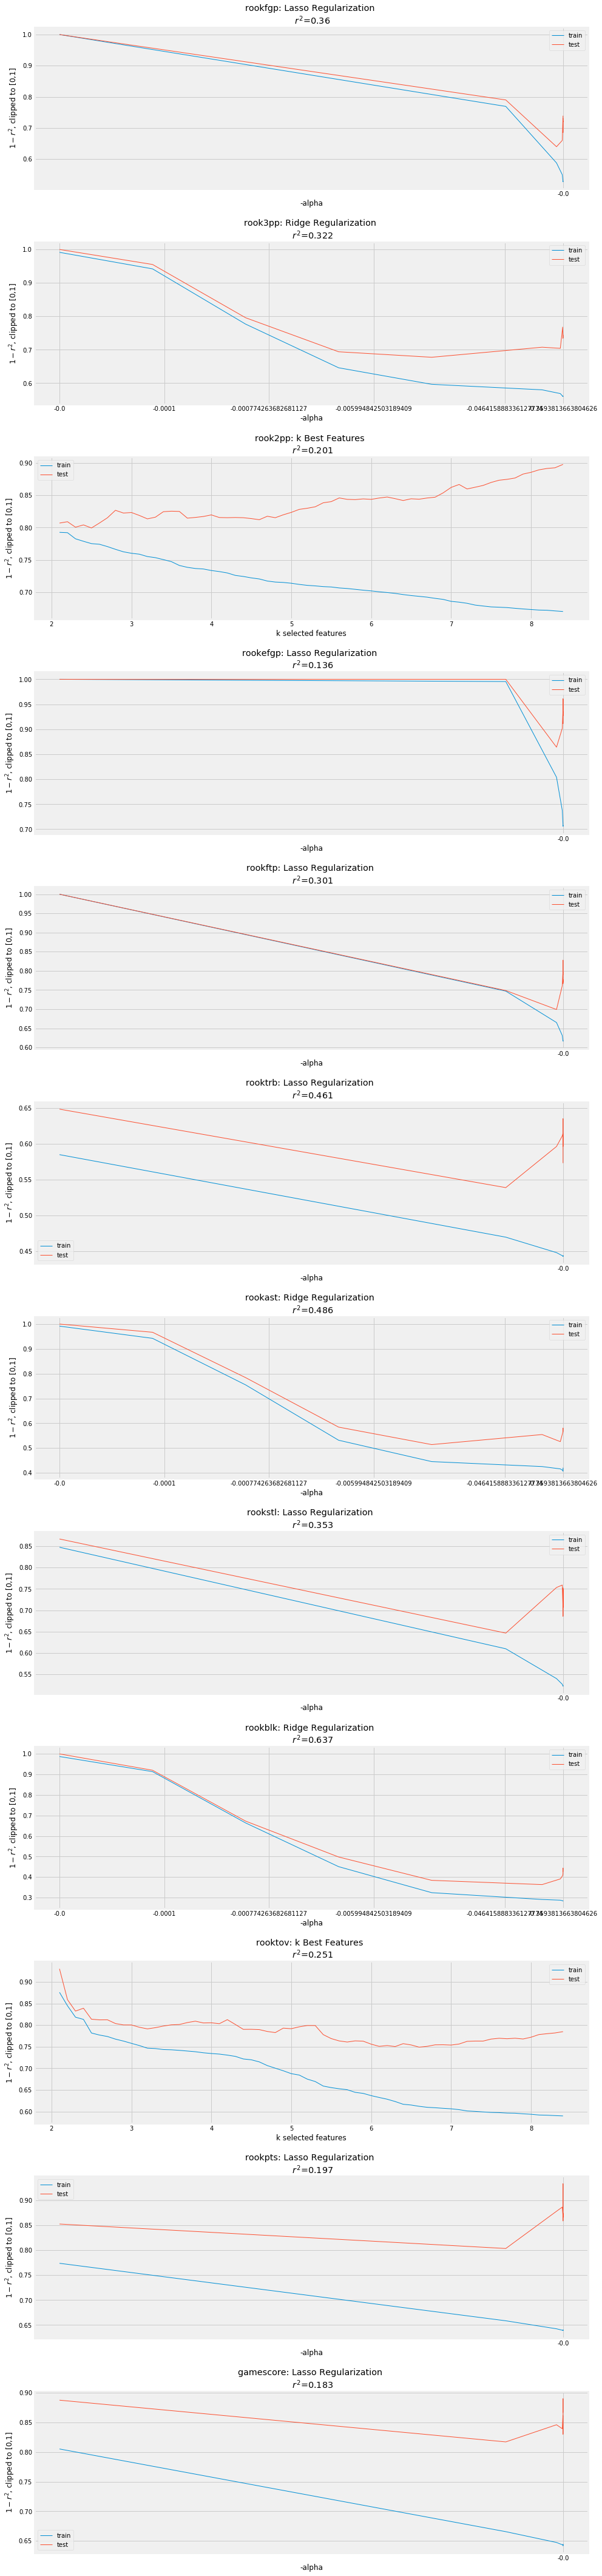

In [36]:
fig, axes = plt.subplots(nrows=len(selector),ncols=1, figsize=(15, len(yCols)*5))
plt.tight_layout(pad=7)
for i,ax in enumerate(axes.flat):
    if selector[i][1] == 'kb':
        ax.set_xlabel("k selected features")
        ax.set_title(f'{selector[i][0]}: k Best Features \n $r^2$={kBestR2[i][1]:.3}')
        ax.plot(kBestPlots[i][0],kBestPlots[i][1],label='train',linewidth=1)
        ax.plot(kBestPlots[i][0],kBestPlots[i][2],label='test',linewidth=1)
        ax.set_xticklabels(kBestPlots[i][0])
    else:
        ax.set_xscale('symlog')
        ax.set_xlabel("-alpha")
        if selector[i][1] == 'lso':
            ax.set_title(f'{selector[i][0]}: Lasso Regularization \n $r^2$={lassoR2[i][1]:.3}')
            ax.plot(lassoPlots[i][0],lassoPlots[i][1],label='train',linewidth=1)
            ax.plot(lassoPlots[i][0],lassoPlots[i][2],label='test',linewidth=1)
            ax.set_xticklabels(lassoPlots[i][0])
        else:
            ax.plot(ridgePlots[i][0],ridgePlots[i][1],label='train',linewidth=1)
            ax.plot(ridgePlots[i][0],ridgePlots[i][2],label='test',linewidth=1)
            ax.set_xticklabels(ridgePlots[i][0])
            ax.set_title(f'{selector[i][0]}: Ridge Regularization \n $r^2$={ridgeR2[i][1]:.3}')
    ax.set_ylabel("$1-r^2$, clipped to [0,1]")
    ax.legend()

###### Plotting of results for 2017

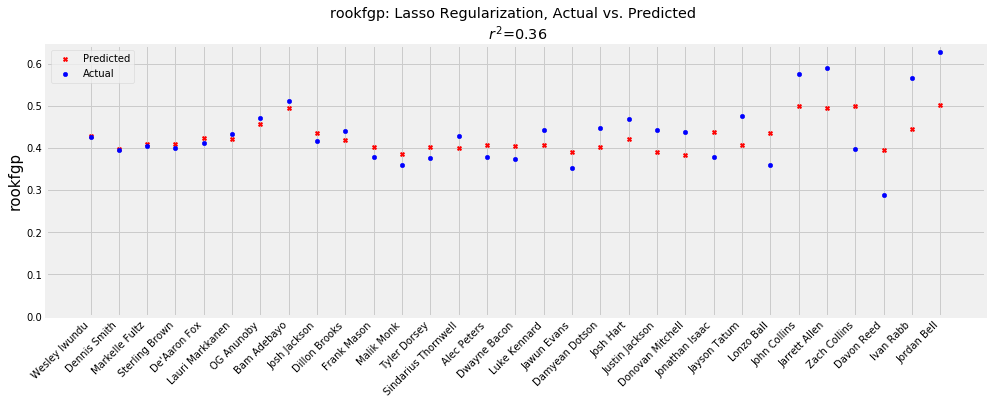

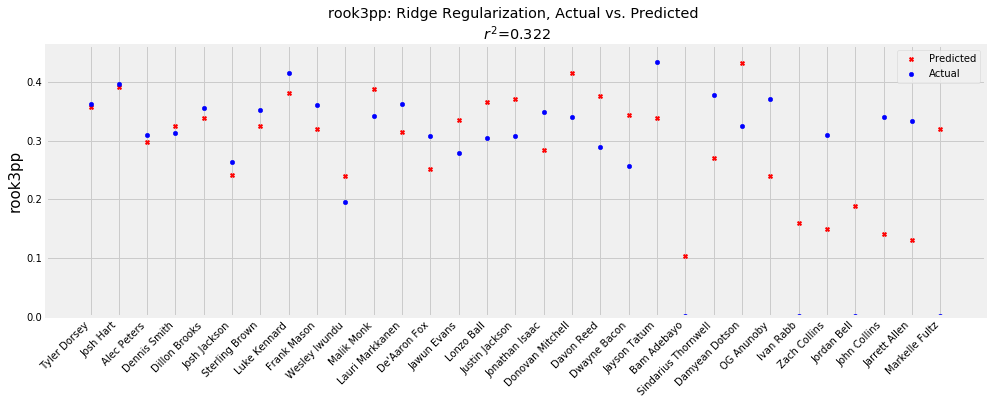

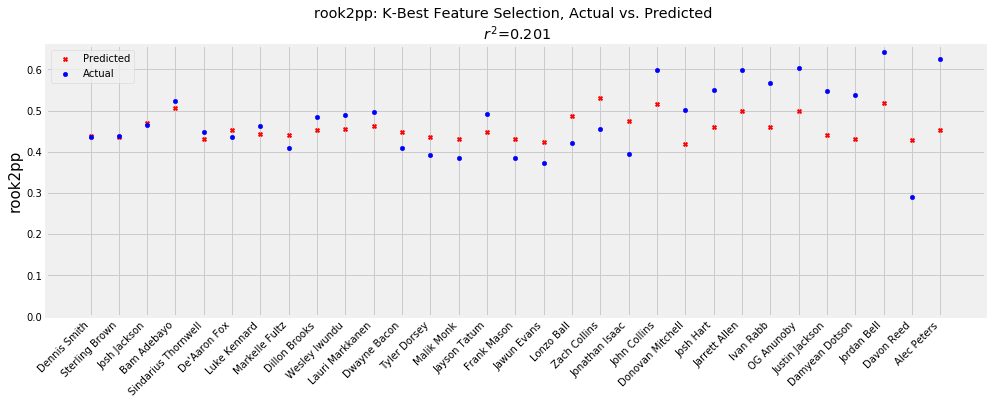

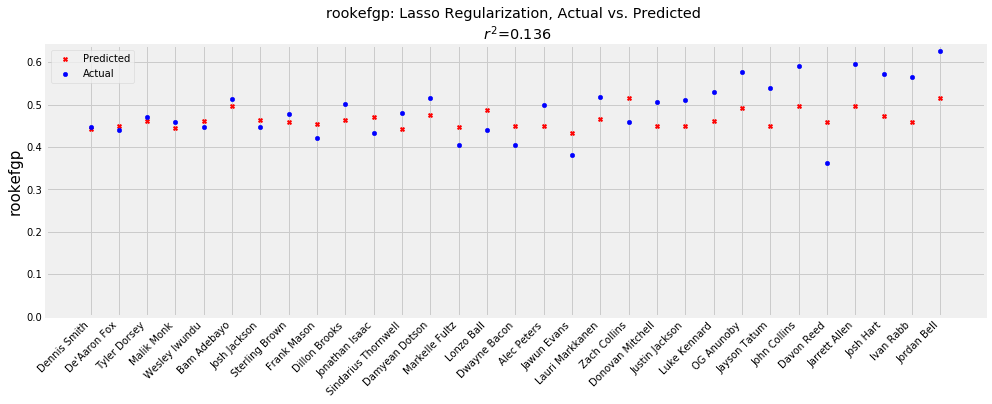

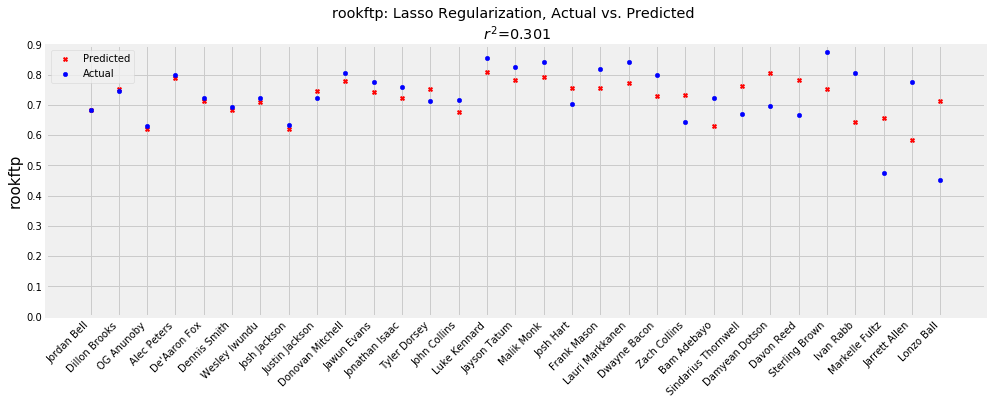

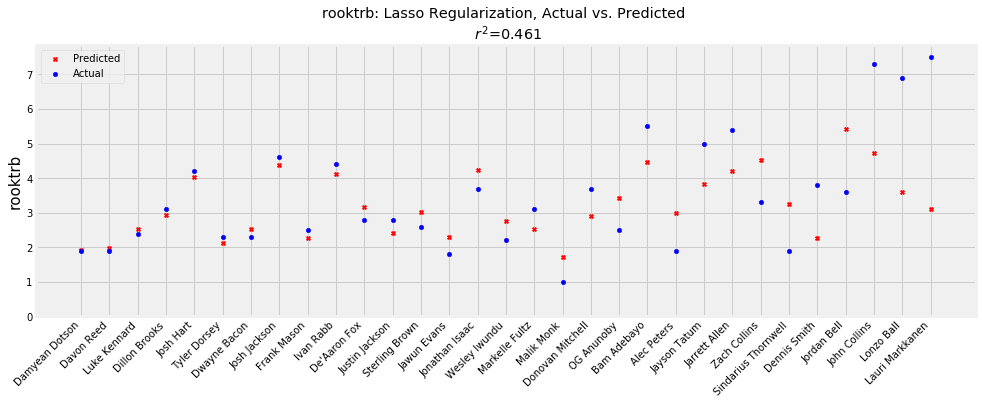

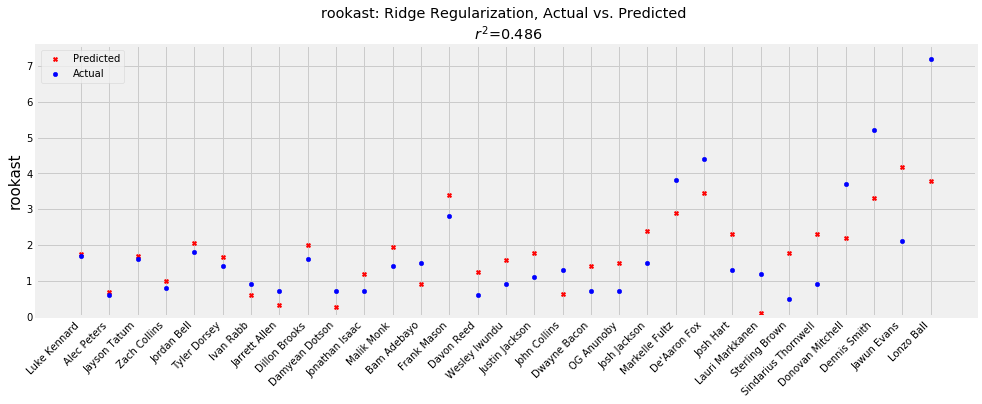

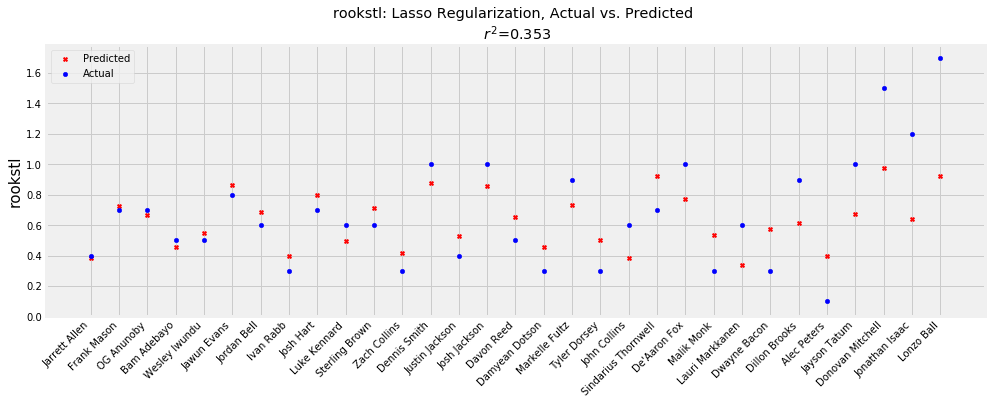

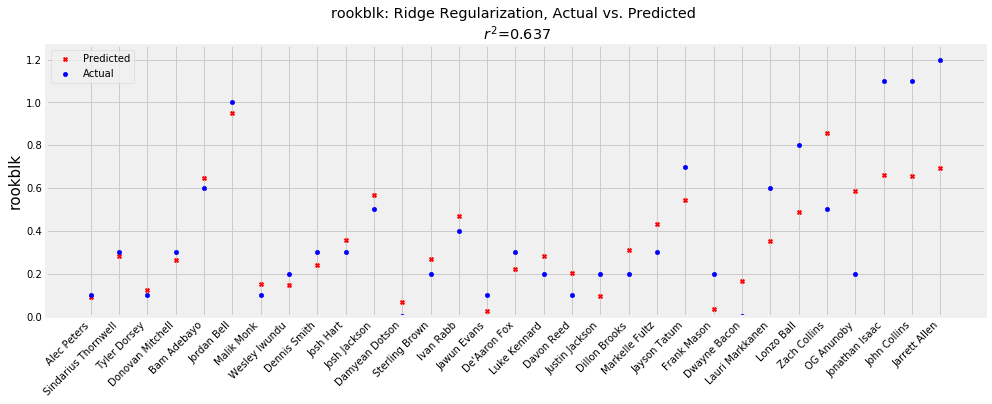

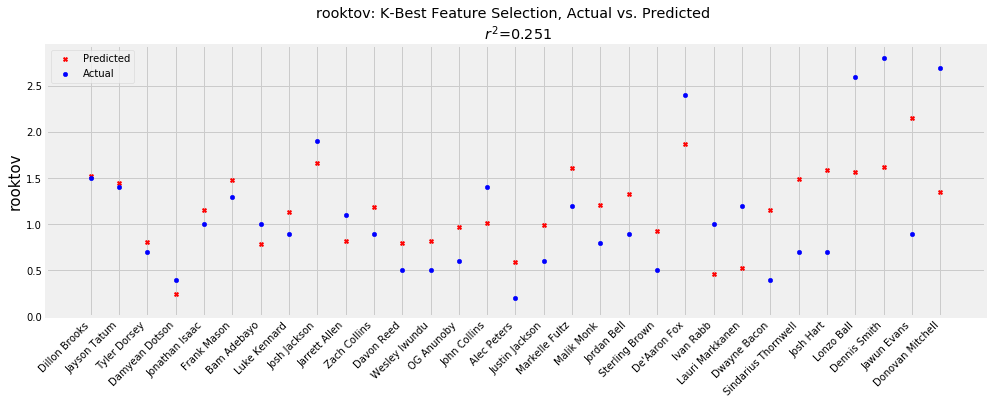

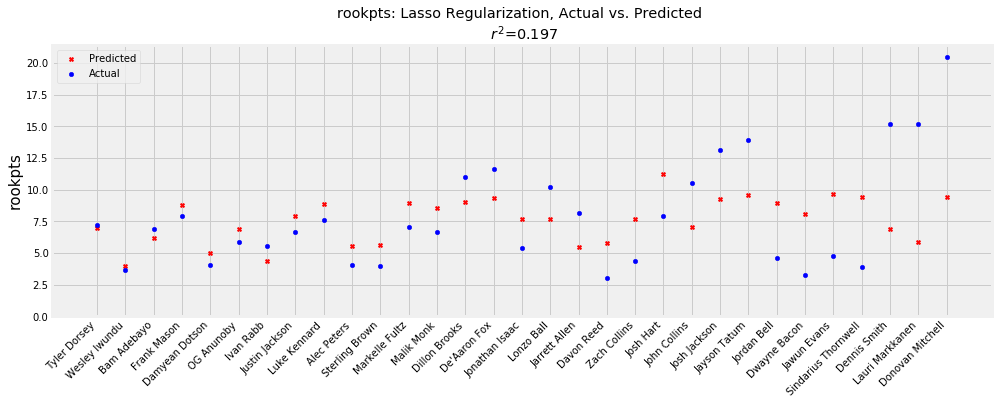

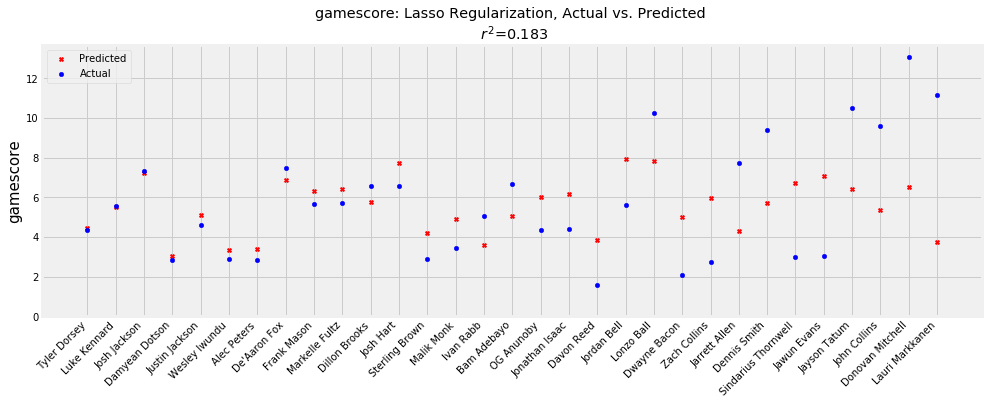

In [37]:
selectedModel = list(range(len(kBestModels)))
for i,ax in enumerate(axes.flat):
    if selector[i][1] == 'kb':
        selectedModel[i] = kBestModels[i]
        ax = plot_predictions_single([yCols[i]], df2017Kbest,'d')
        ax.set_title(f'{selector[i][0]}: K-Best Feature Selection, Actual vs. Predicted \n $r^2$={kBestR2[i][1]:.3}')
    elif selector[i][1] == 'rdg':
        selectedModel[i] = ridgeModels[i]
        ax = plot_predictions_single([yCols[i]], df2017Ridge,'d')
        ax.set_title(f'{selector[i][0]}: Ridge Regularization, Actual vs. Predicted \n $r^2$={ridgeR2[i][1]:.3}')
    else:
        selectedModel[i] = lassoModels[i]
        ax = plot_predictions_single([yCols[i]], df2017Lasso,'d')
        ax.set_title(f'{selector[i][0]}: Lasso Regularization, Actual vs. Predicted \n $r^2$={lassoR2[i][1]:.3}')

###### Check residuals

In [39]:
residDf = plotDf[plotDf.draftyear < 2017][['player','draftyear'] + xCols + yCols].copy()
for cols in yCols:
    residDf['pred_' + cols] = 0

In [40]:
for i in range(len(yCols)):
    if len(selectedModel[i]) == 2:
        theModel = pickle.loads(selectedModel[i][0])
        theDf = residDf[selectedModel[i][1]]
    else:
        theModel = pickle.loads(selectedModel[i])
        theDf = residDf[xCols]
    residDf['pred_' + yCols[i]] = theModel.predict(theDf)

[Text(0,0,'colmp'),
 Text(0,0,'colfg'),
 Text(0,0,'colfga'),
 Text(0,0,'colfgp'),
 Text(0,0,'col2p'),
 Text(0,0,'col2pa'),
 Text(0,0,'col2pp'),
 Text(0,0,'col3p'),
 Text(0,0,'col3pa'),
 Text(0,0,'col3pp'),
 Text(0,0,'colft'),
 Text(0,0,'colfta'),
 Text(0,0,'colftp'),
 Text(0,0,'coltrb'),
 Text(0,0,'colast'),
 Text(0,0,'colstl'),
 Text(0,0,'colblk'),
 Text(0,0,'coltov'),
 Text(0,0,'colfouls'),
 Text(0,0,'colpts'),
 Text(0,0,'colsos'),
 Text(0,0,'height'),
 Text(0,0,'weight'),
 Text(0,0,'teamfg'),
 Text(0,0,'teamfga'),
 Text(0,0,'teamfgp'),
 Text(0,0,'team2p'),
 Text(0,0,'team2pa'),
 Text(0,0,'team2pp'),
 Text(0,0,'team3p'),
 Text(0,0,'team3pa'),
 Text(0,0,'team3pp'),
 Text(0,0,'teamft'),
 Text(0,0,'teamfta'),
 Text(0,0,'teamftp'),
 Text(0,0,'teamorb'),
 Text(0,0,'teamdrb'),
 Text(0,0,'teamtrb'),
 Text(0,0,'teamast'),
 Text(0,0,'teamstl'),
 Text(0,0,'teamblk'),
 Text(0,0,'teamtov'),
 Text(0,0,'teampf'),
 Text(0,0,'teampts'),
 Text(0,0,'oppfg'),
 Text(0,0,'oppfga'),
 Text(0,0,'oppfgp'),
 

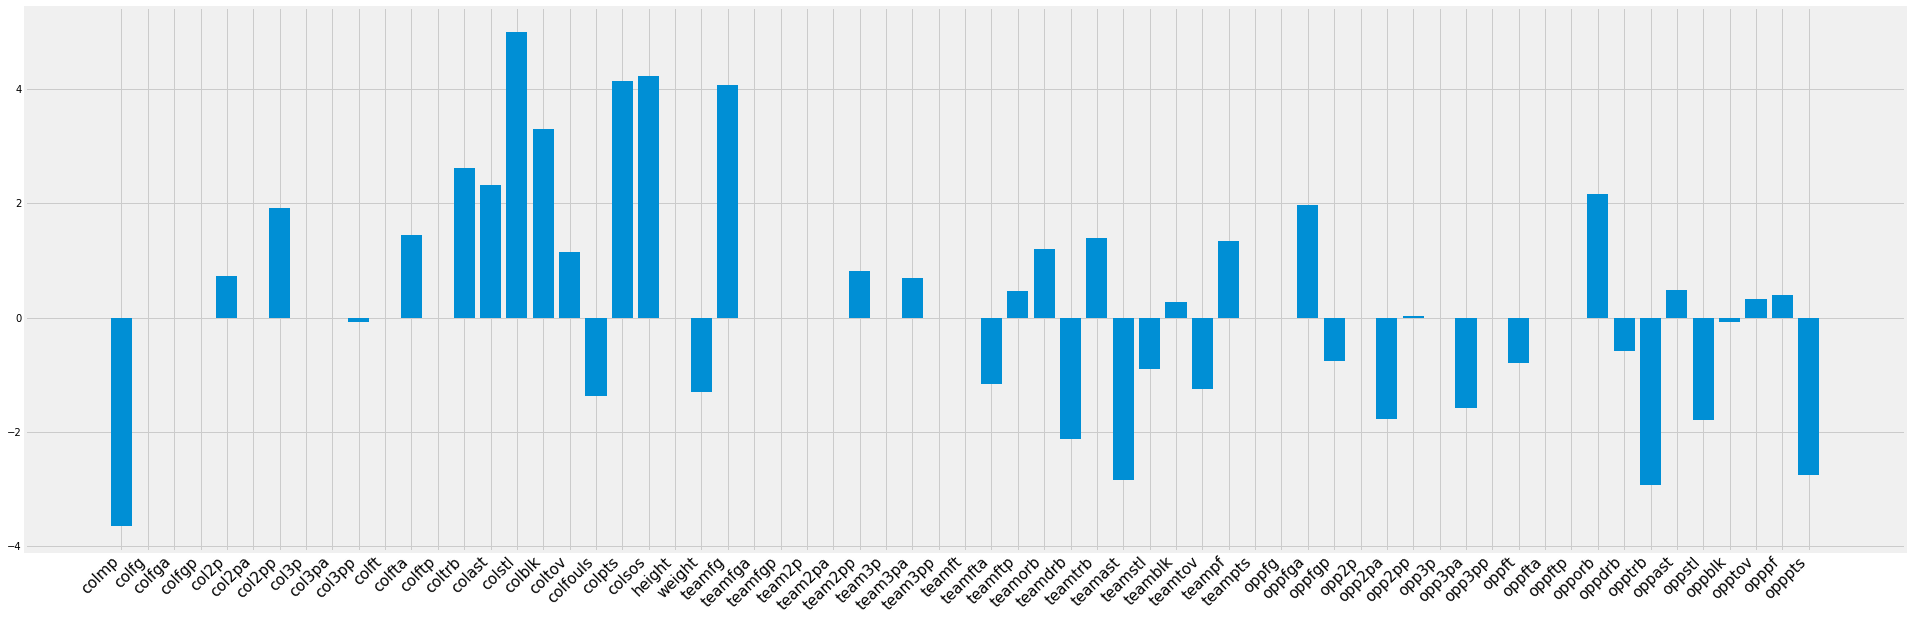

In [42]:
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(30, 10))

coefs = pickle.loads(selectedModel[-1]).named_steps["model"].coef_
labels = xCols

ax.bar(range(len(xCols)),coefs)
# ax.set_xticklabels(list(theDif.player),rotation=45,fontsize=10,ha="right")
ax.set_xticks(range(len(xCols)))
ax.set_xticklabels(labels,rotation=45,ha='right',fontsize=15)

In [43]:
def resid_plot(y_cols,predDf):
    """
    Plot the predicted values for a set of columns in a a given data frame 
    Sort style must be by p (predicted val), a (actual val), or d (difference)
    """
    fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(15, len(y_cols)*5))
    players = predDf.player
    fig.set_facecolor('white')
    numPlayers = len(players)
    theDif = predDf
    curr_i = y_cols[0]
    ax.fontsize = 20
    theDif['dif'] = predDf['pred_'+curr_i] - predDf[curr_i]
#     ax.scatter(range(numPlayers),theDif['dif'], s=20,c='red',marker='X')
#     axTwin = ax.twin()
#     ax.hist(theDif['dif'])
    
    ax.scatter(predDf[curr_i], theDif['dif'])
    
    ax.set_title(f'{curr_i}: Actual vs. Predicted', color='black')
    return ax

    

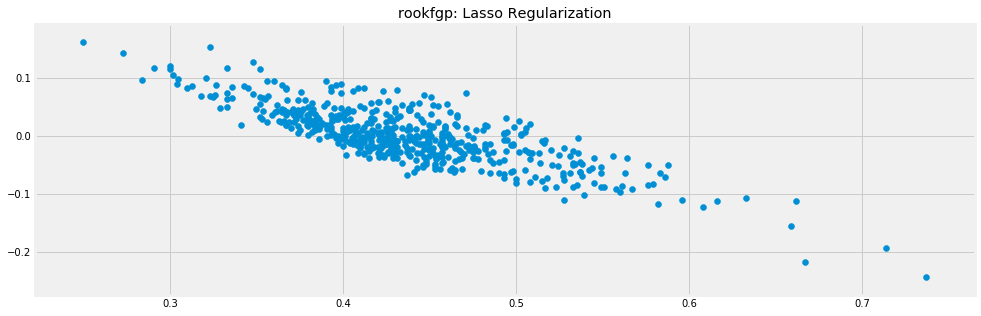

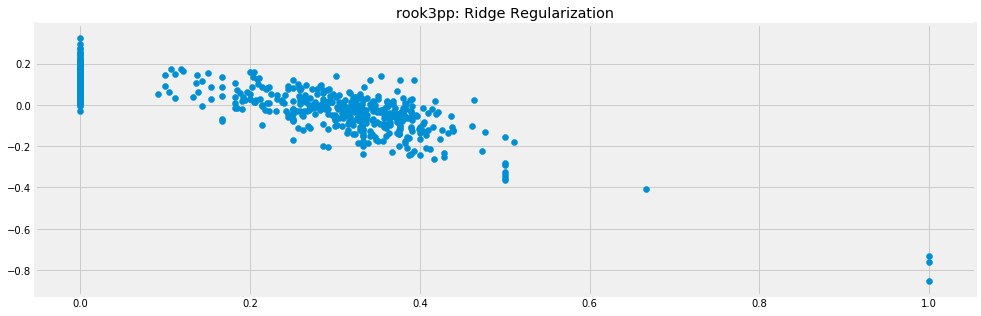

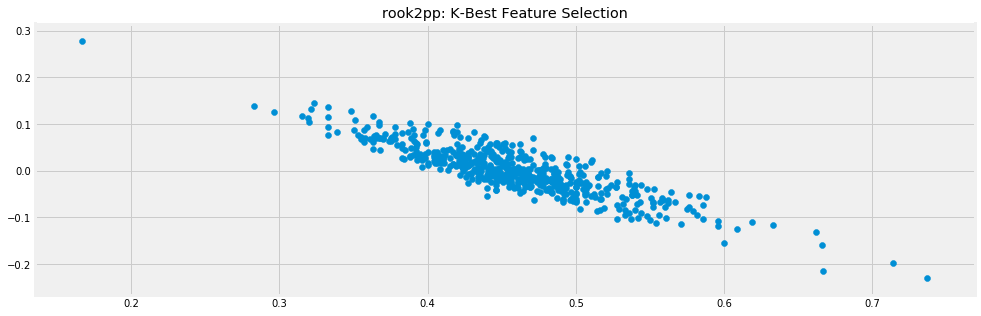

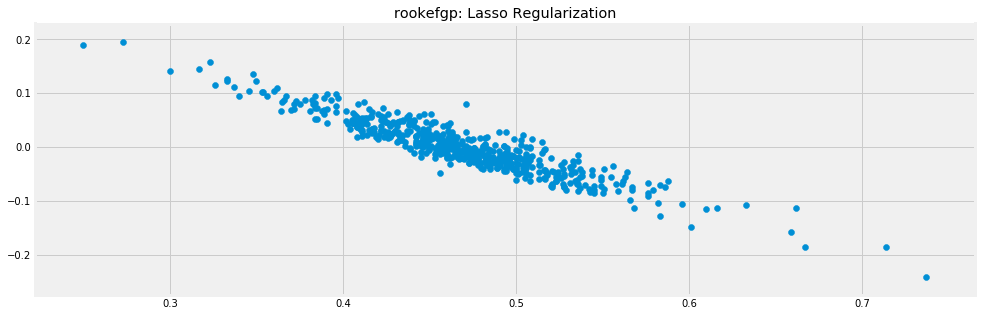

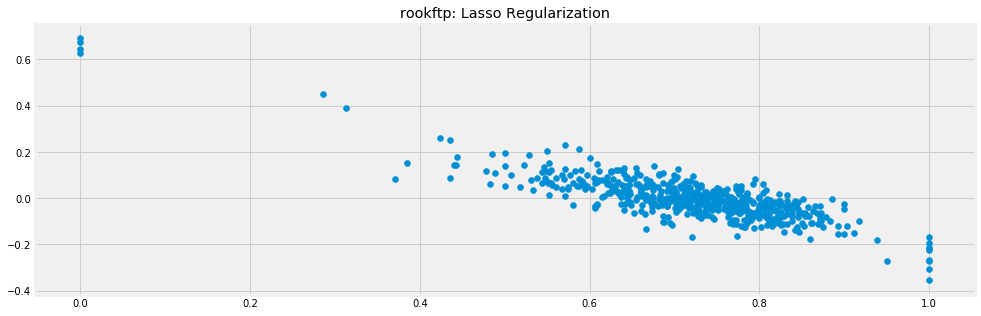

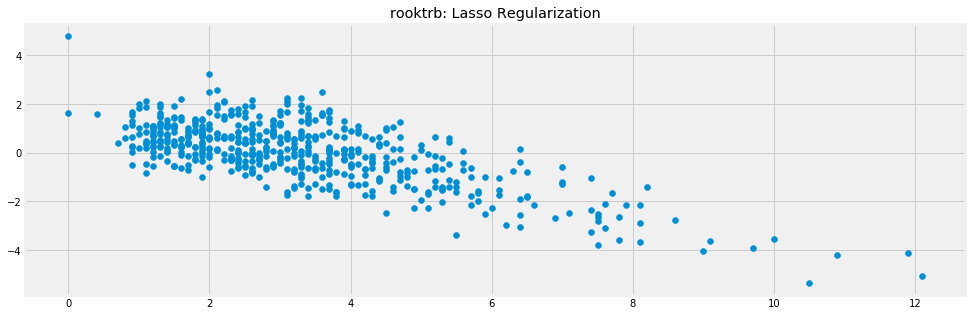

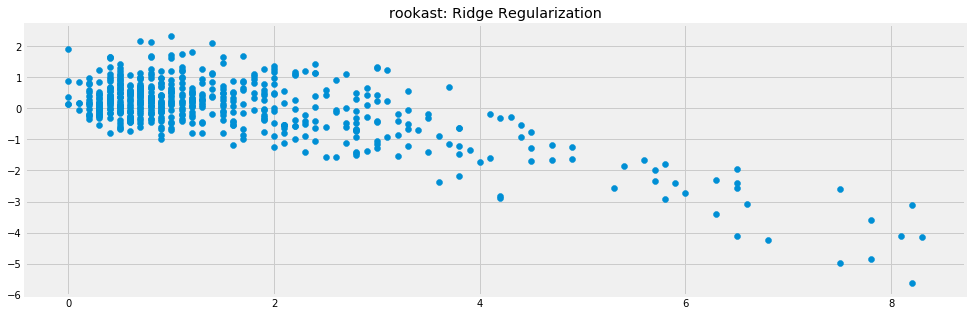

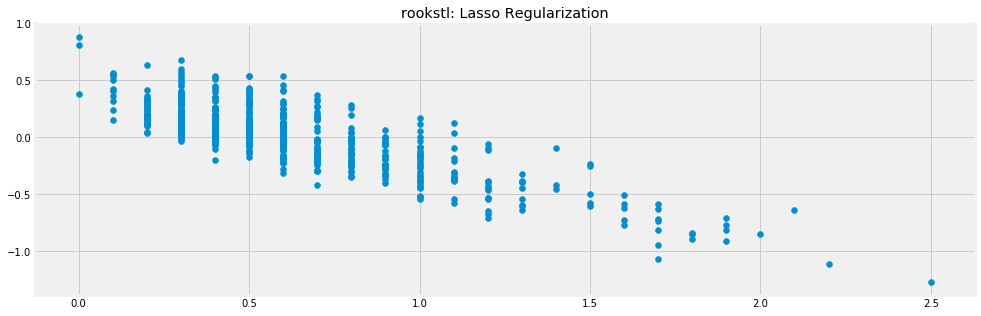

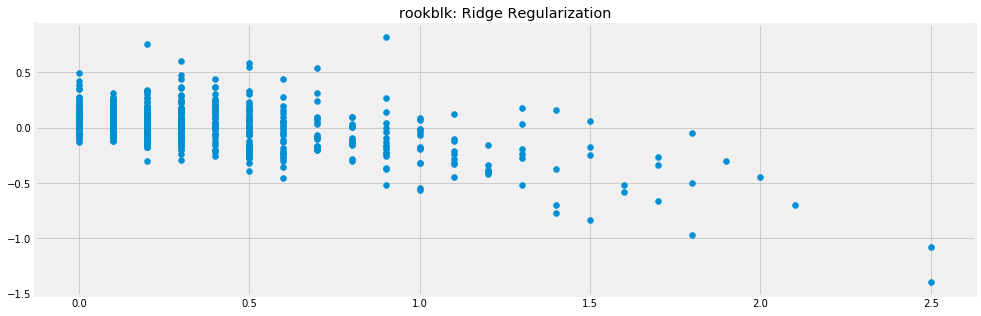

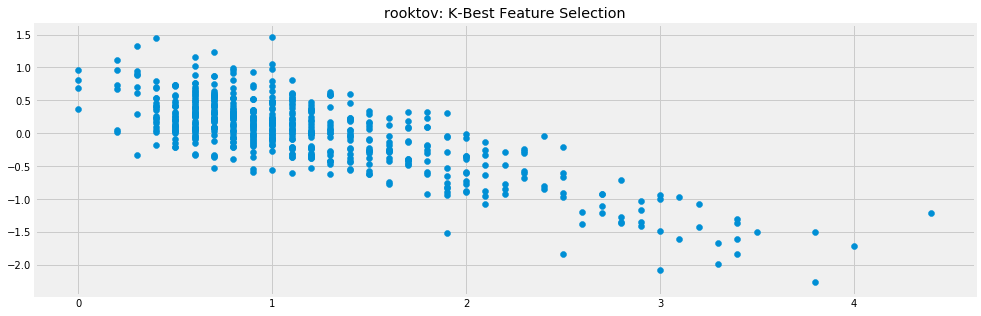

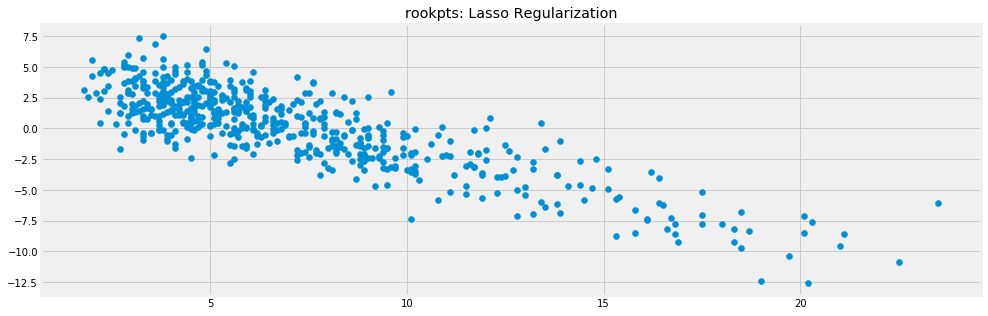

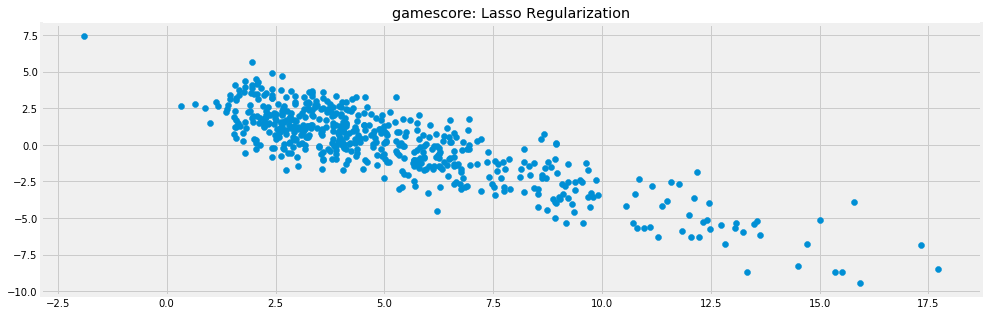

In [44]:
for i,ax in enumerate(axes.flat):
    if selector[i][1] == 'kb':
        ax = resid_plot([yCols[i]], residDf)
        ax.set_title(f'{selector[i][0]}: K-Best Feature Selection')
    elif selector[i][1] == 'rdg':
        ax = resid_plot([yCols[i]], residDf)
        ax.set_title(f'{selector[i][0]}: Ridge Regularization')
    else:
        ax = resid_plot([yCols[i]], residDf)
        ax.set_title(f'{selector[i][0]}: Lasso Regularization')

In [45]:
medianDf = residDf.groupby('draftyear')[predictionCols].median()
maxDf = residDf.groupby('draftyear')[predictionCols].max()
print(pd.DataFrame(list(zip(predictionCols,list(medianDf.median()),list(maxDf.median())))))

                 0         1          2
0     pred_rookfgp  0.429827   0.510128
1     pred_rook3pp  0.254589   0.381697
2     pred_rook2pp  0.454221   0.518594
3    pred_rookefgp  0.463788   0.510422
4     pred_rookftp  0.721195   0.827218
5     pred_rooktrb  3.162894   5.942376
6     pred_rookast  1.466661   4.017836
7     pred_rookstl  0.613367   1.130955
8     pred_rookblk  0.332070   1.109172
9     pred_rooktov  1.191510   2.030673
10    pred_rookpts  7.138516  11.837914
11  pred_gamescore  5.234962   8.673930


### Collection of data for 2018 Draft

In [46]:
requests2018 = requests.get('https://www.sports-reference.com/cbb/seasons/2018-school-stats.html').text
soup2018 = BeautifulSoup(requests2018,'html5lib')

In [47]:
teamLinks = []
for row in soup2018.find('table').find_all('tr'):
    if row.find_all('td'):
        teamLinks.append('https://www.sports-reference.com' + row.find_all('td')[0].find('a')['href'])

In [48]:
with open("teamStats2018.pkl", 'rb') as picklefile: 
    oldData = pickle.load(picklefile)
    
allTeams2018 = oldData

In [49]:
# playerLinks = []
# allTeams2018 = []
# myCount = 0
# for theTeam in teamLinks:
#     myCount+=1
#     print(f'Gathering stats and roster for team {myCount} out of {len(teamLinks)}')
#     teamPage = requests.get(theTeam).text
#     teamSoup = BeautifulSoup(teamPage,'html5lib')
    
#     #Team stats
#     teamStatsTable = (teamSoup.find_all('table'))[1]
#     tableRows = teamStatsTable.find_all('tr')
#     teamStatRow = tableRows[1].find_all('td')
#     games = float(teamStatRow[0].text)
#     teamStats = [theTeam]
#     for val in teamStatRow[2:-1]:
#         if val.text=='':
#             teamStats.append(0)
#         elif float(val.text) < 1:
#             teamStats.append(float(val.text))
#         else:
#             teamStats.append(float(val.text)/games)

#     oppStatRow = tableRows[3].find_all('td')
#     for val in oppStatRow[2:-1]:
#         if val.text=='':
#             teamStats.append('BLANK')
#         elif float(val.text) < 1:
#             teamStats.append(float(val.text))
#         else:
#             teamStats.append(float(val.text)/games)
#     allTeams2018.append(teamStats)
#     with open("teamStats2018.pkl", 'wb') as picklefile: 
#         pickle.dump(allTeams2018,picklefile)
    
#     #Roster info
#     roster = teamSoup.find(class_='table_outer_container').find('table')
#     for row in roster.find_all('tr'):
#         if row.find_all('td'):
#             player = row.find_all('th')[0].find('a').text
#             pLink = row.find_all('th')[0].find('a')['href']
#             playerLinks.append([player,'https://www.sports-reference.com' + pLink,2018])
#     sleep(0.5)

In [50]:
with open("basketball_data_2018.pkl", 'rb') as picklefile: 
    oldData2018 = pickle.load(picklefile)

picklePlayers = []
for row in oldData:
    picklePlayers.append(row[1])

playerStats2018 = oldData2018

In [51]:
# playerStats2018 = []
# errorPlayers = []
# myCount = 1
# for player in playerLinks:
#     try:
#         toAdd = False
#         print(f'Gathering data for player {myCount} out of {len(playerLinks)}')
#         myCount+=1
#         cbbRequest = requests.get(player[1]).text
#         cbbSoup = BeautifulSoup(cbbRequest,"html5lib")
#         cbbtable = cbbSoup.find('table')
#         if cbbtable:
#             summary = cbbSoup.find(class_='players').find_all('p')
#             vitalsLoc = -1
#             for i in range(len(summary)):
#                 if 'Position' in summary[i].text:
#                     vitalsLoc = i + 1
#             if vitalsLoc == -1:
#                 vitalsLoc = 0
#             vitals = (summary[vitalsLoc].text).split(u'\xa0')
#             if ',' in vitals[0]:
#                 toAdd = True
#                 heightSplit = vitals[0][:-1].split('-')
#                 height = float(heightSplit[0]) * 12 + float(heightSplit[1])
#                 weight = float(vitals[1][:-2])
#             else:
#                 if len(vitals) > 1:
#                     print('Player')
#                     if 'cm' in vitals[1]:
#                         toAdd = True
#                         heightSplit = vitals[0].split('-')
#                         height = float(heightSplit[0]) * 12 + float(heightSplit[1])
#                     elif 'kg' in vitals[1]:
#                         toAdd = True
#                         weight = float(vitals[0][:-2])
#             tableRows = cbbtable.find_all('tr')
#             for i in range(1,len(tableRows)):
#                 allHeaders = tableRows[i].find_all('th')
#                 for head in allHeaders:
#                     if head.text == 'Career':
#                         finalSeason = i-1
#             finalSeasonStats = [x.text for x in tableRows[finalSeason].find_all('td')]
#             schoolLink = 'https://www.sports-reference.com' + tableRows[finalSeason].find_all('td')[0].find('a')['href']
#             relevantStats = finalSeasonStats[4:26]+[finalSeasonStats[27], height,weight,schoolLink]
#             if toAdd:
#                 playerStats2018.append(player + relevantStats)
#                 with open('basketball_data_2018.pkl', 'wb') as picklefile:
#                     pickle.dump(playerStats2018, picklefile)
#     except Exception as e:
#         print('Error found')
#         errorPlayers.append(player)
#     sleep(0.5)

In [52]:
cbbTable = 'MP | FG | FGA | FG% | 2P | 2PA | 2P% | 3P | 3PA | 3P% | FT | FTA | FT% | ORDB | DRB | TRB | AST | STL | BLK | TOV | FOULS | PTS | SOS'
cbbCols = cbbTable.split(' | ')
updCols = [('col' + x.lower()).replace('%','p') for x in cbbCols]
updCols = ['player','playerlink','draftyear'] + updCols + ['height','weight','teamlink']

In [53]:
df2018Players = pd.DataFrame(playerStats2018,columns=updCols)
df2018Teams = pd.DataFrame(allTeams2018,columns=teamStatCols)

df2018PlayersTeams = pd.merge(df2018Players,df2018Teams,how='left',on='teamlink')

In [54]:
df2018PlayersTeams.dropna(inplace=True)

In [55]:
for col in df2018PlayersTeams.columns:
    df2018PlayersTeams[col] = df2018PlayersTeams[col].apply(convert_to_float)

for col in df2018PlayersTeams.columns[3:-1]:
    if col != 'teamlink':
        if col[-2:] == 'pp' or col[-2:] == 'tp' or col[-3:] == 'fgp':
            df2018PlayersTeams.loc[df2018PlayersTeams[col]==-123456,col] = 0
        else:
            theAvg = df2018PlayersTeams[df2018PlayersTeams[col] != -123456][col].mean()
            df2018PlayersTeams.loc[df2018PlayersTeams[col]==-123456,col] = theAvg

In [56]:
df2018Clean = df2018PlayersTeams[(df2018PlayersTeams.colmp > 10)]

In [57]:
for col in yCols:
    df2018Clean['pred_' + col] = 0

In [58]:
for i in range(len(yCols)):
    print(yCols[i])
    if len(selectedModel[i]) == 2:
        theModel = pickle.loads(selectedModel[i][0])
        theDf = df2018Clean[selectedModel[i][1]]
    else:
        theModel = pickle.loads(selectedModel[i])
        theDf = df2018Clean[xCols]
    df2018Clean['pred_' + yCols[i]] = theModel.predict(theDf)

rookfgp
rook3pp
rook2pp
rookefgp
rookftp
rooktrb
rookast
rookstl
rookblk
rooktov
rookpts
gamescore


In [63]:
pctIncrement = 1/len(residDf)
for col in predictionCols:
    residDf.sort_values(col,inplace=True)
    df2018Clean[col + 'percentile'] = \
    (residDf[col].searchsorted(df2018Clean[col]))*pctIncrement

rookfgp
rook3pp
rook2pp
rookefgp
rookftp
rooktrb
rookast
rookstl
rookblk
rooktov
rookpts
gamescore


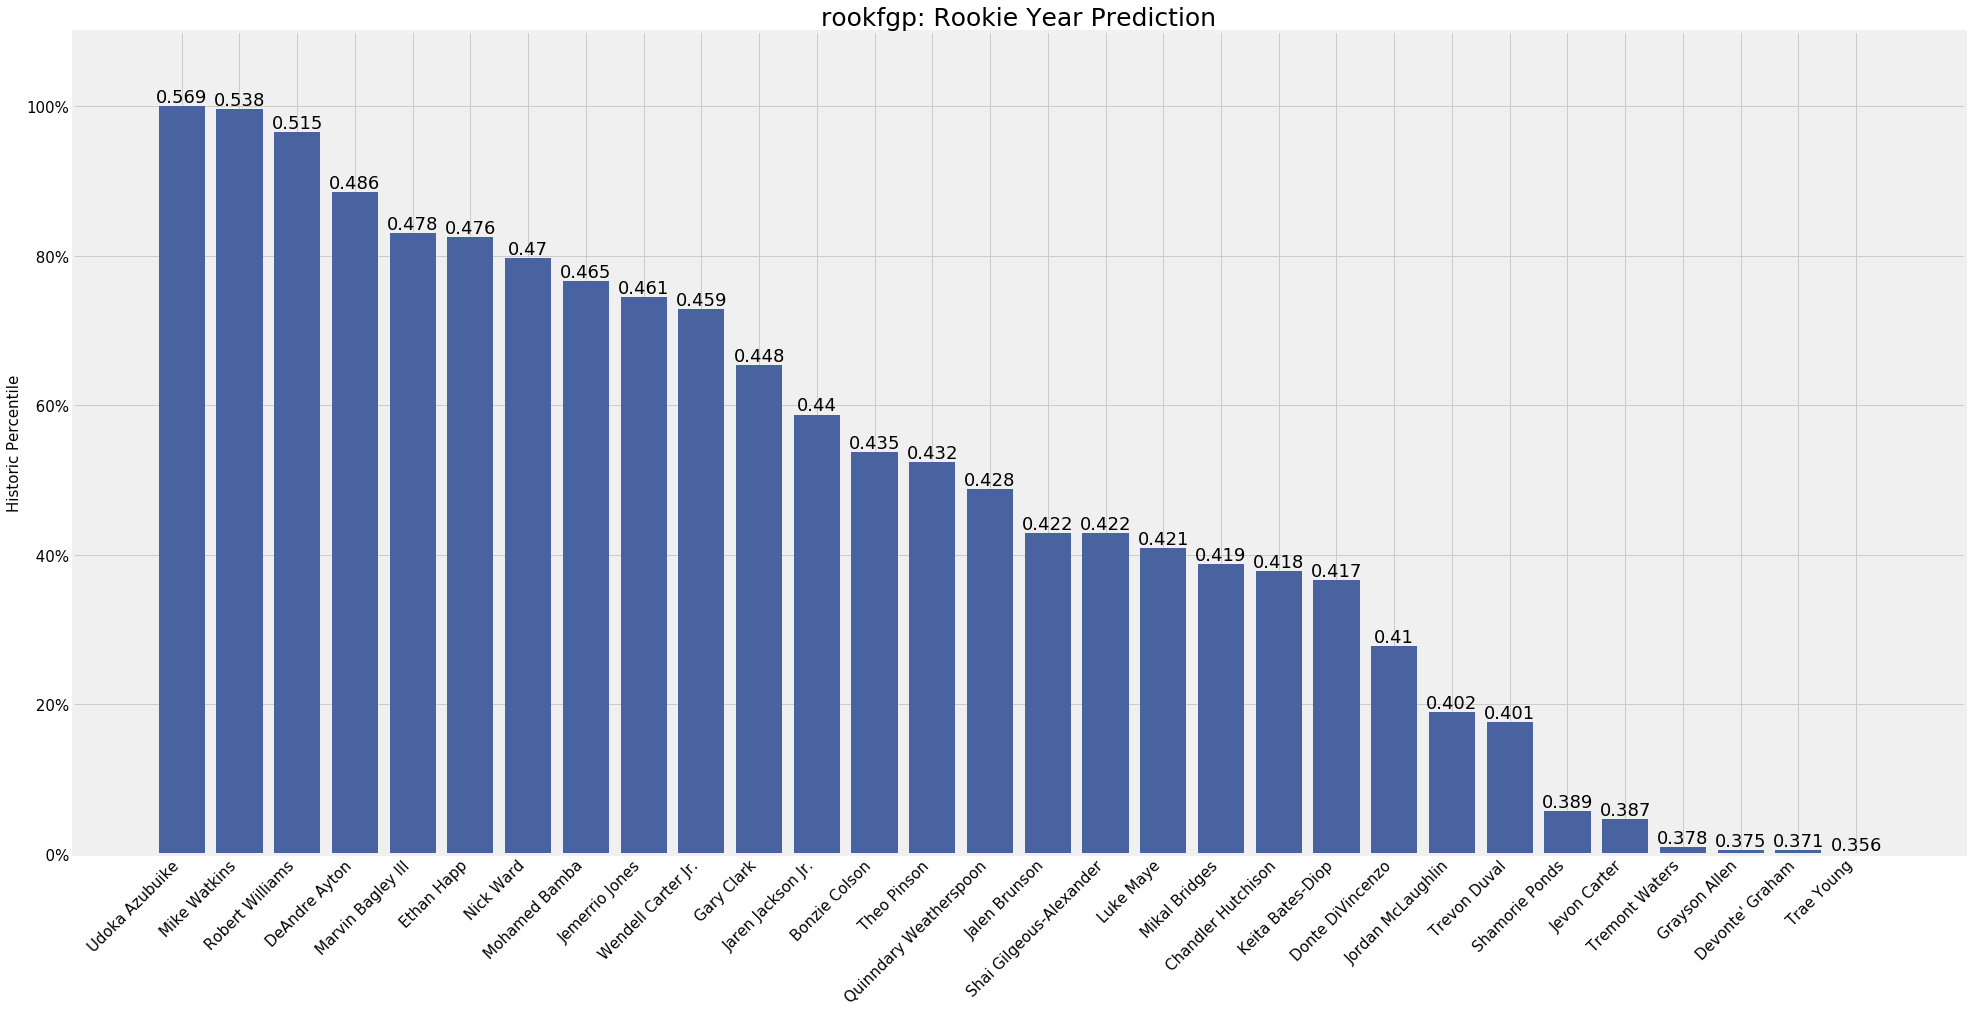

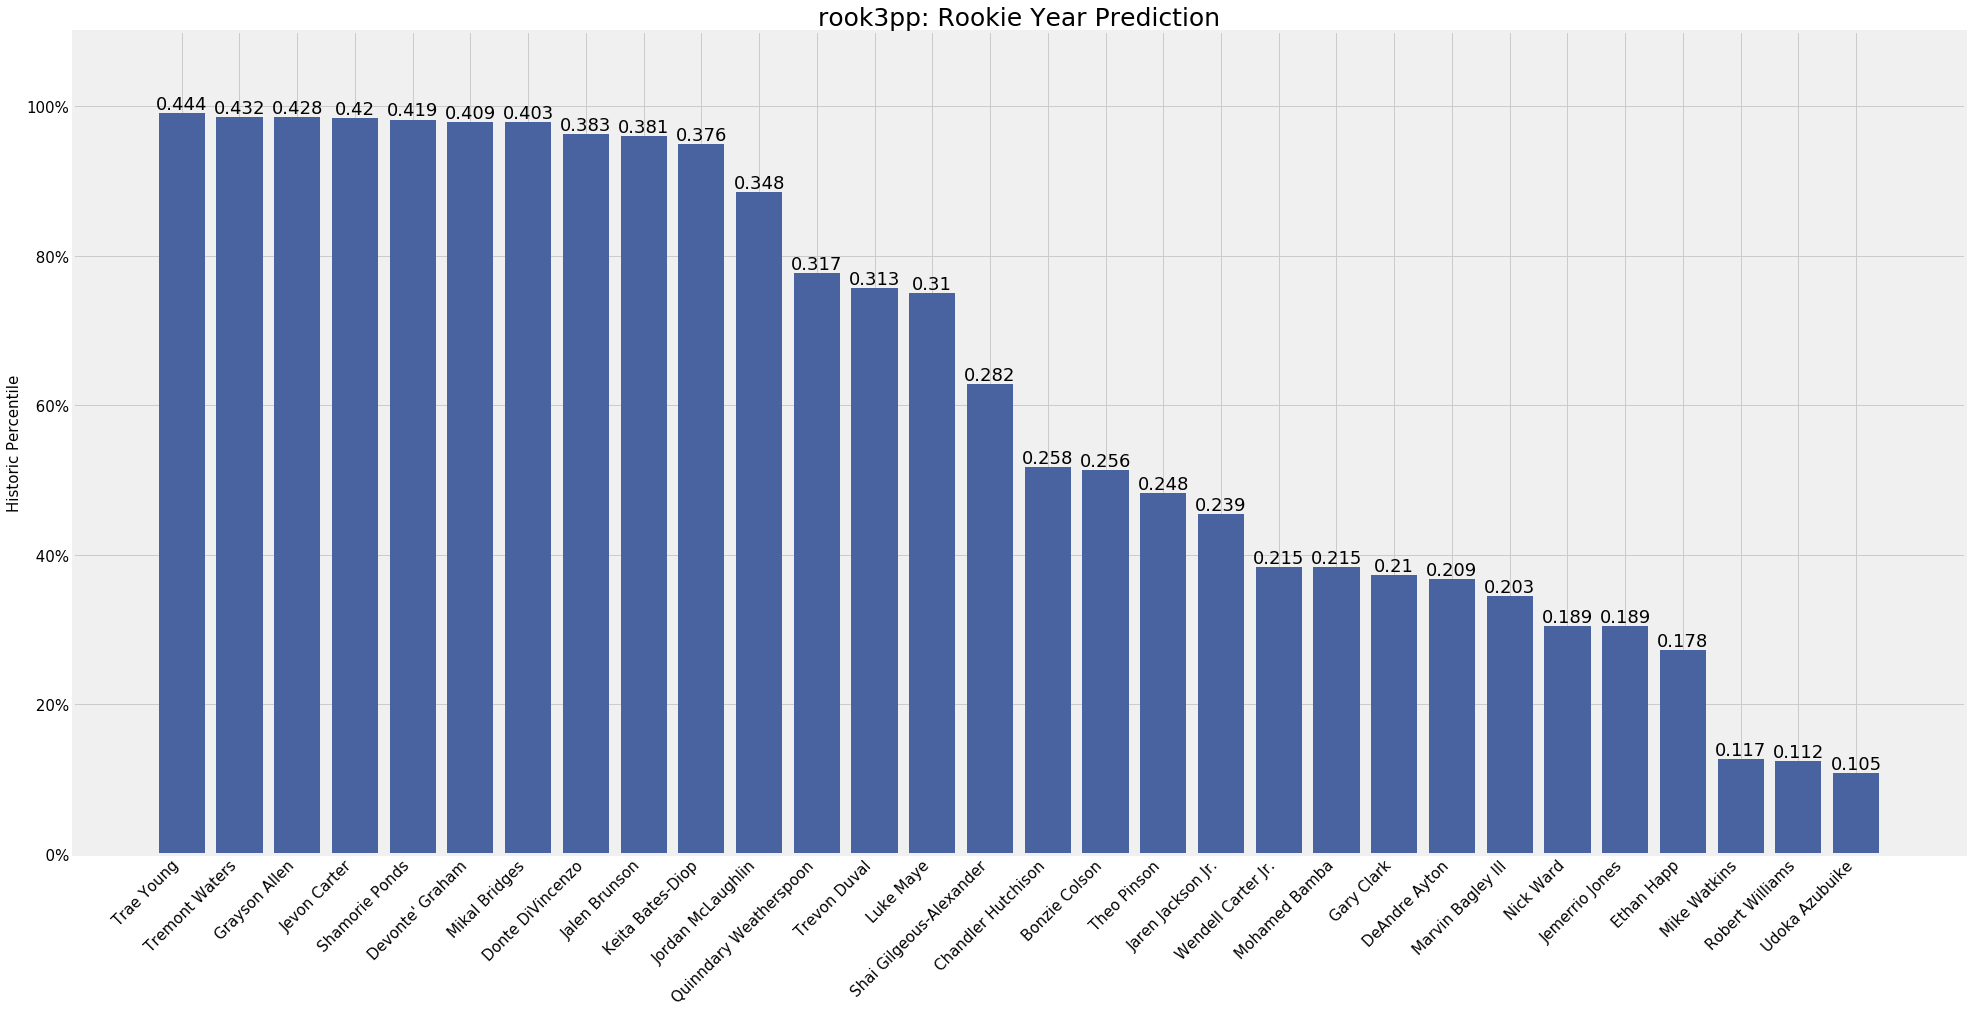

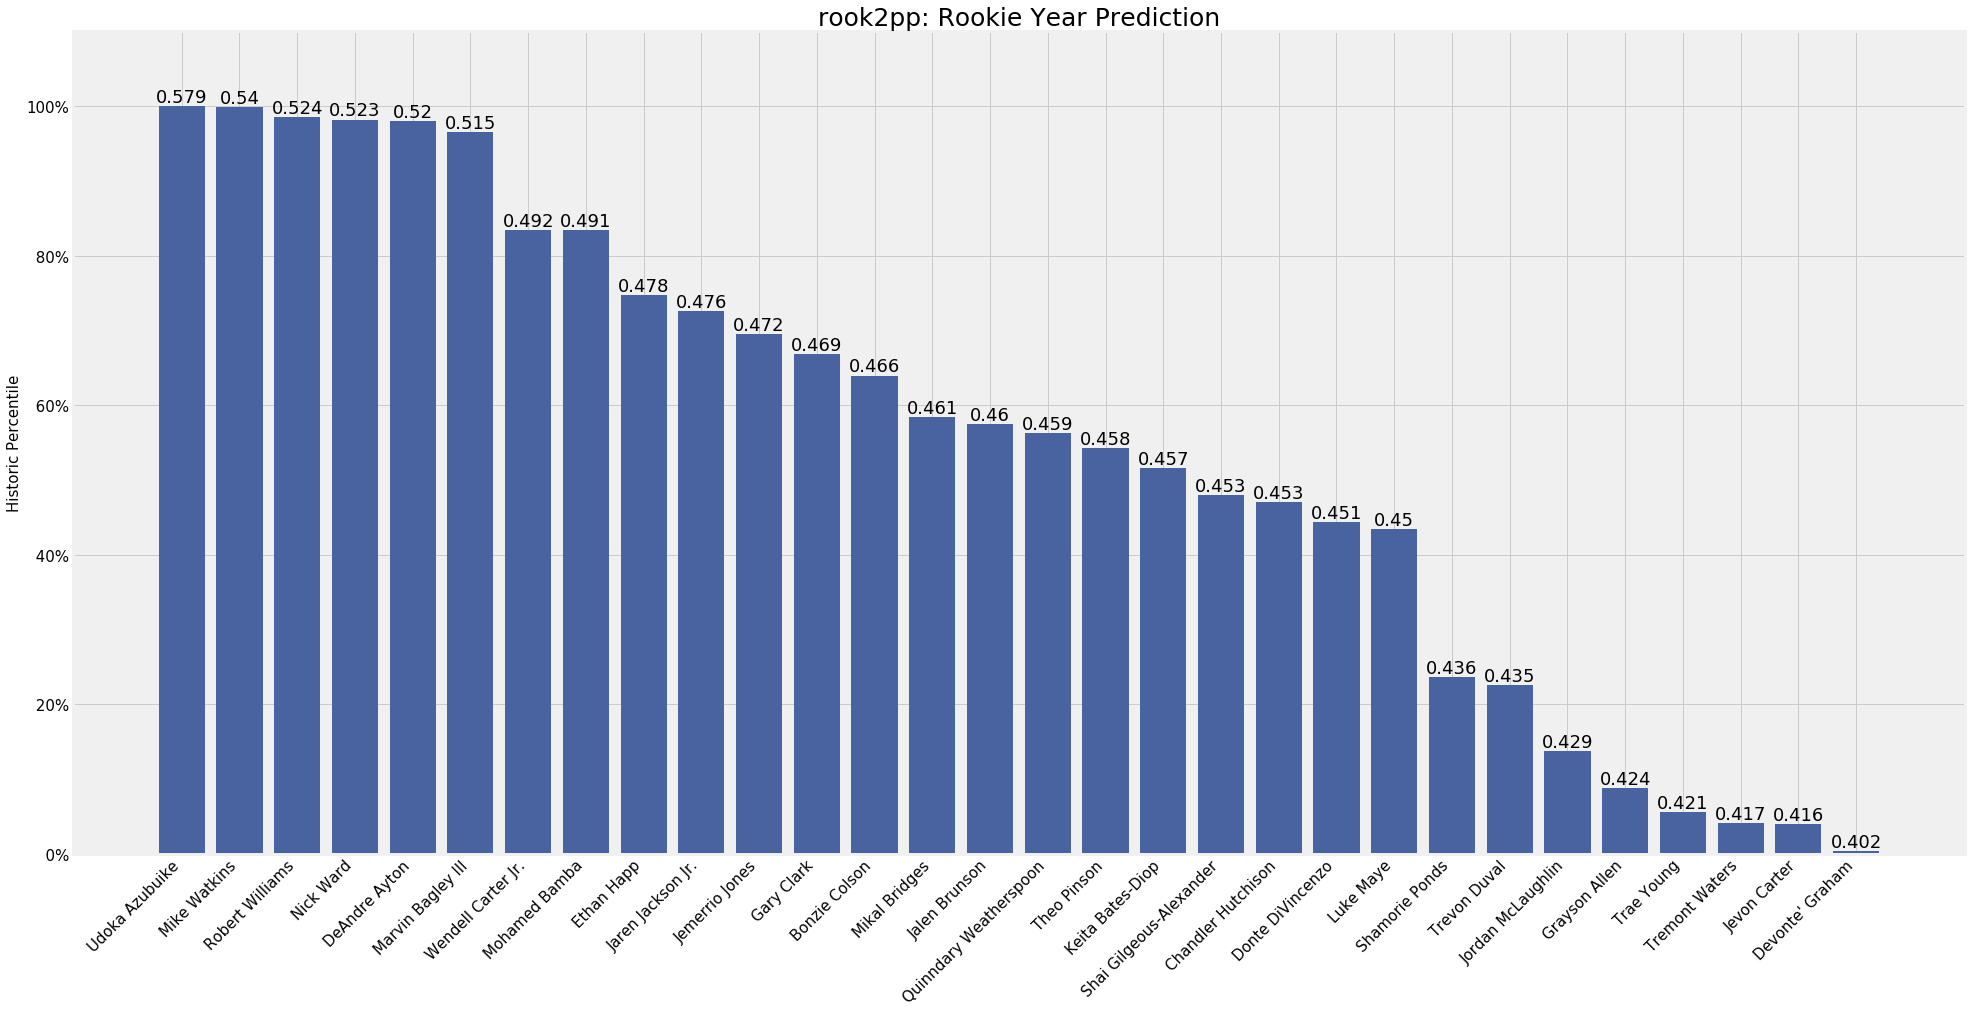

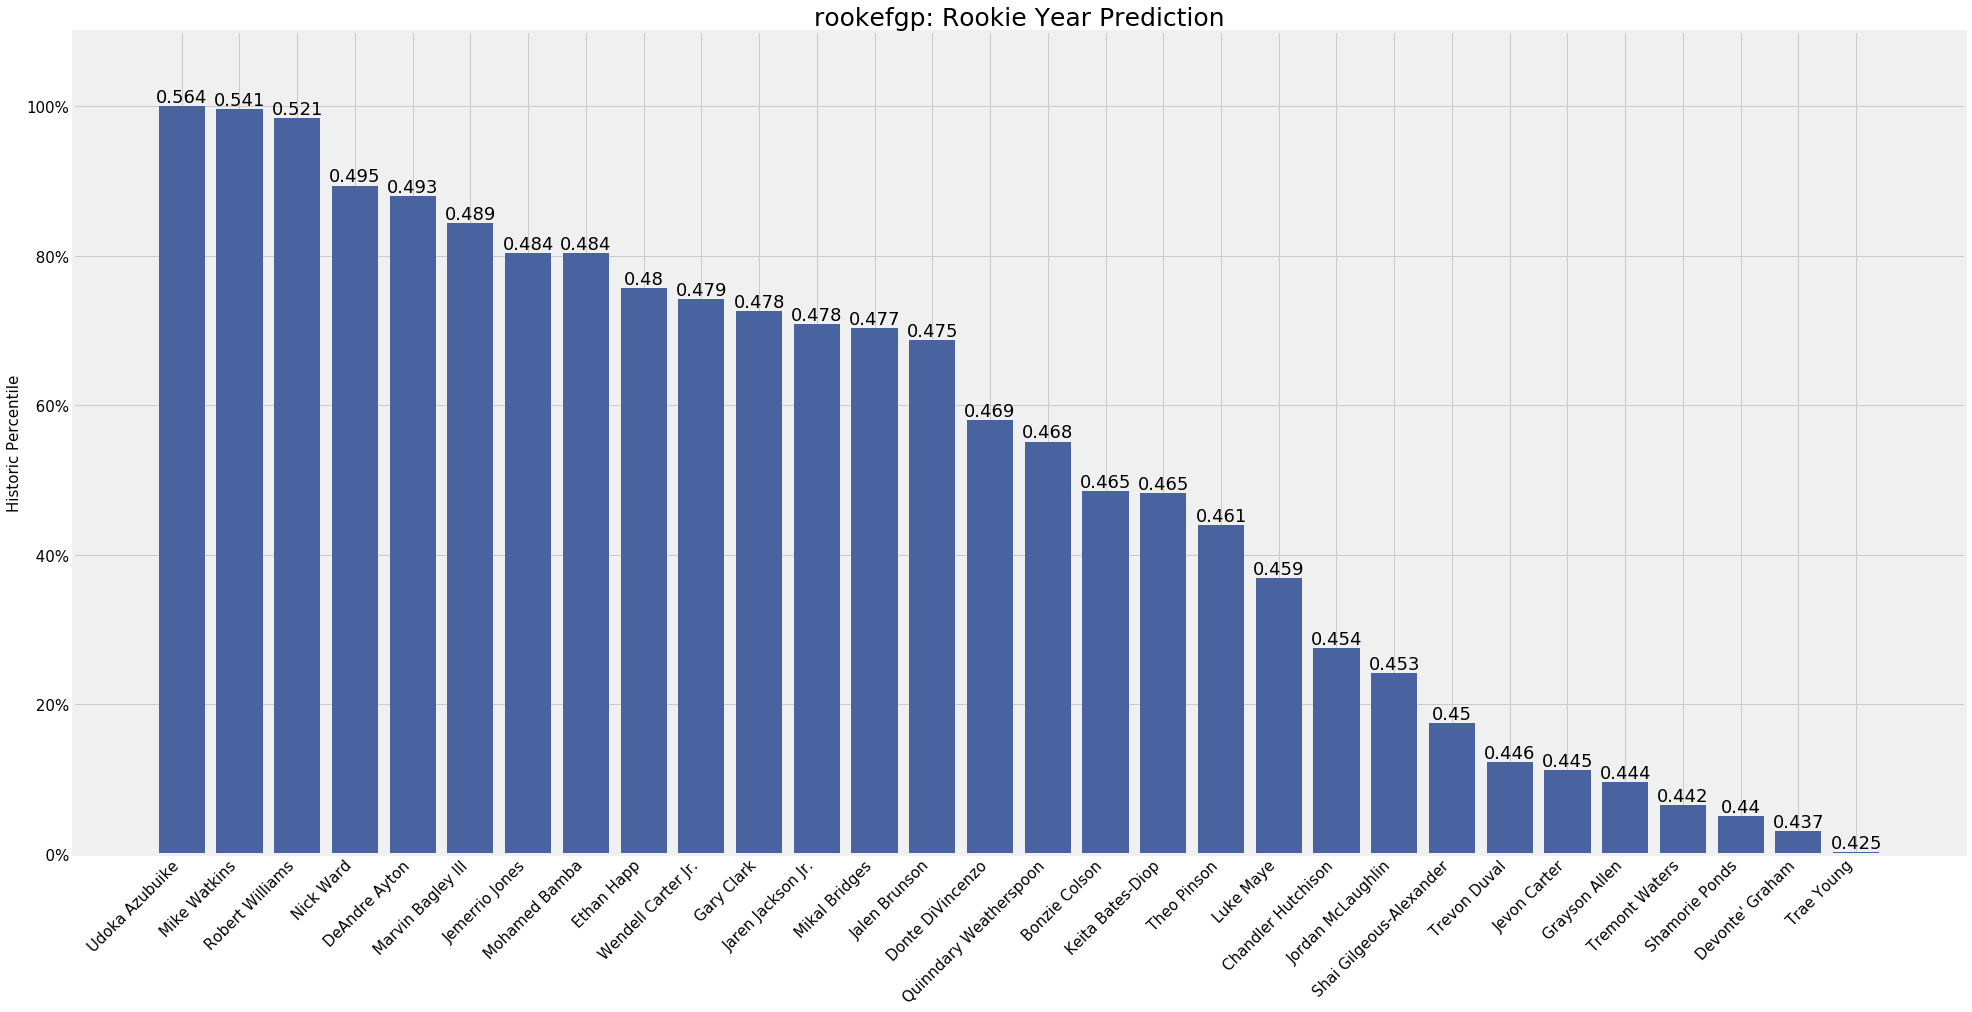

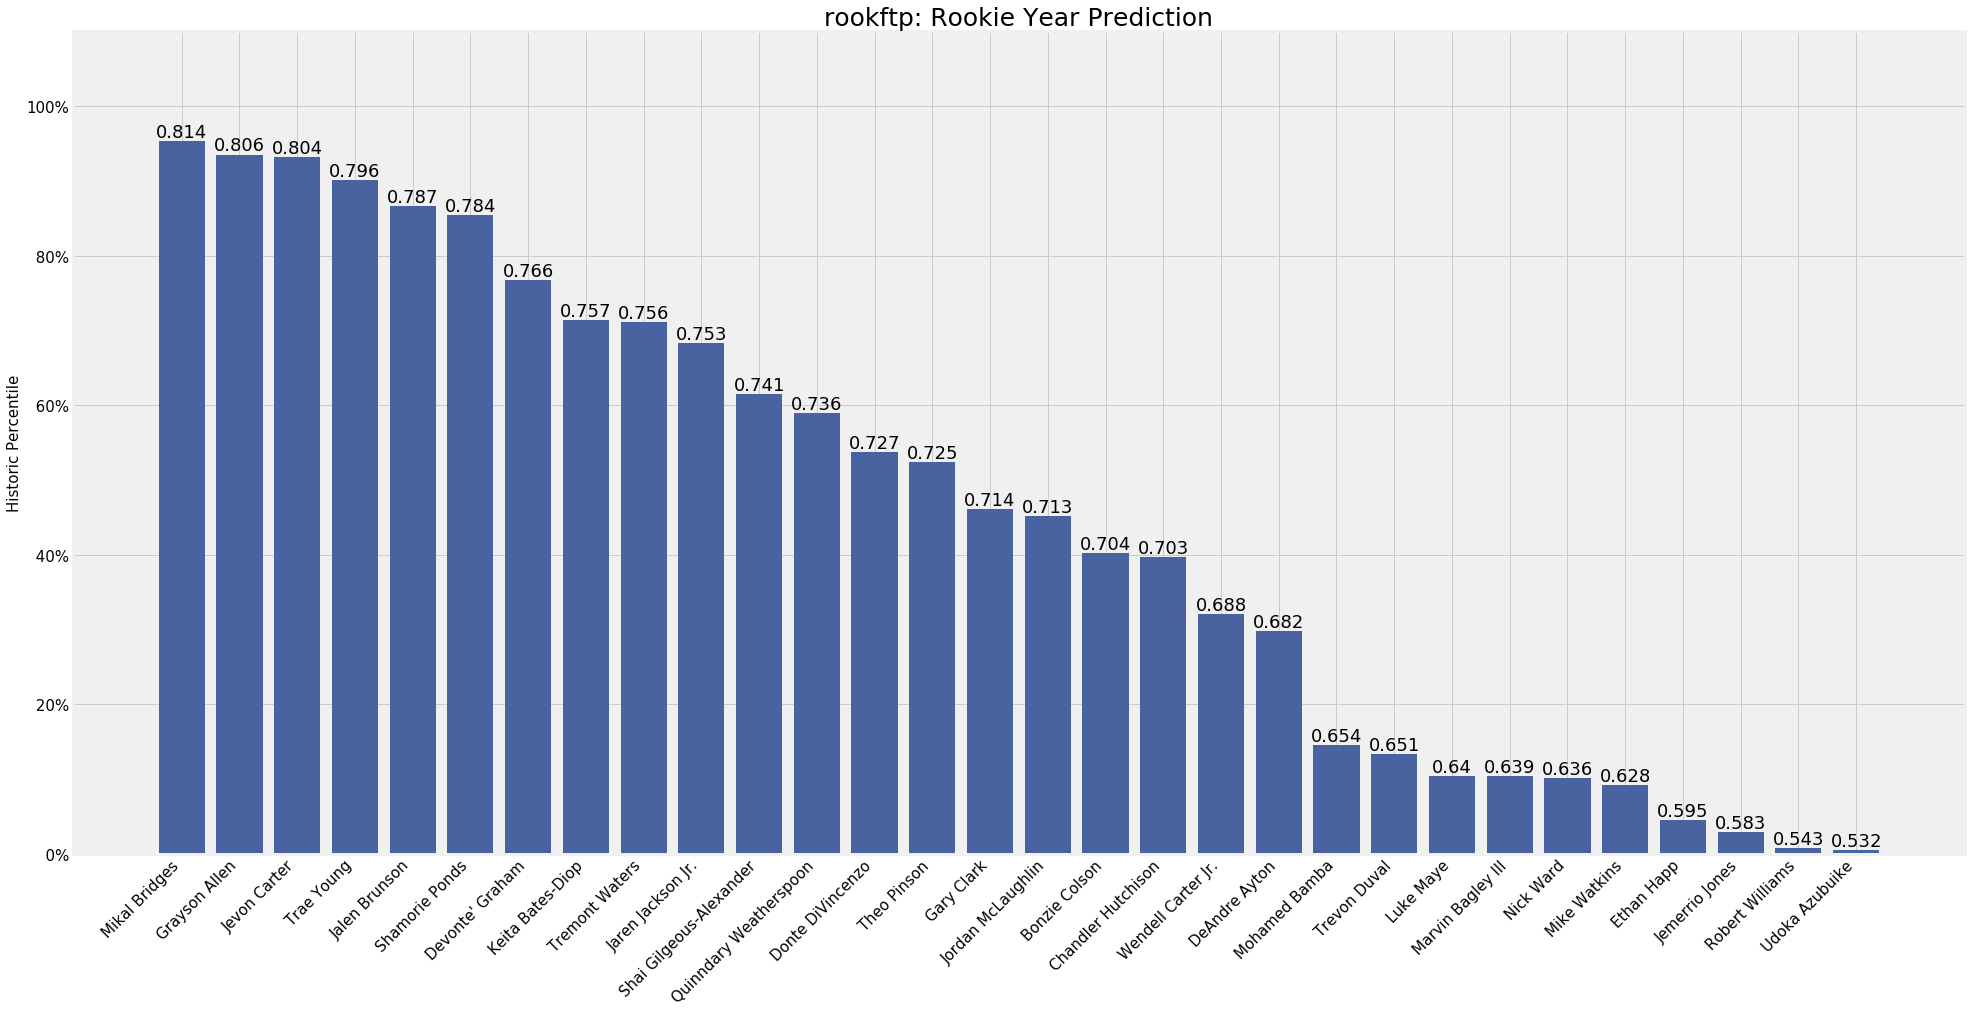

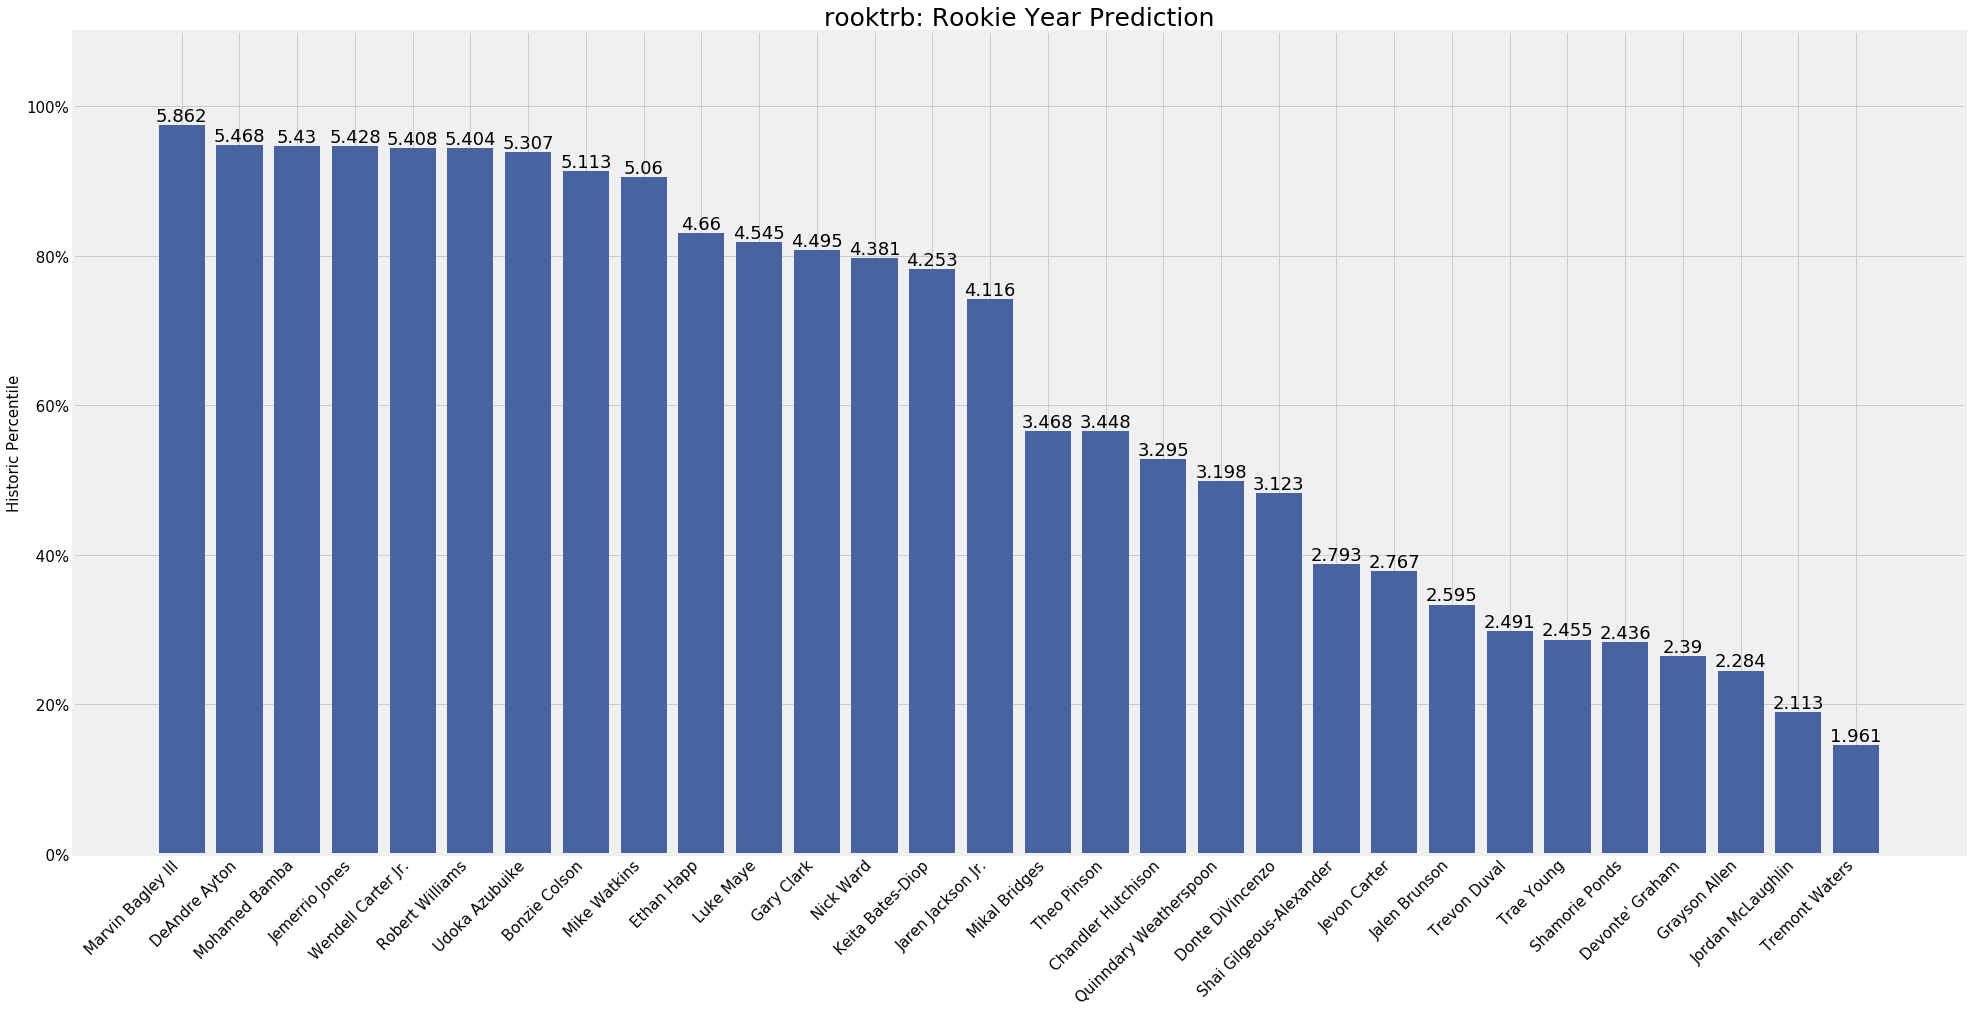

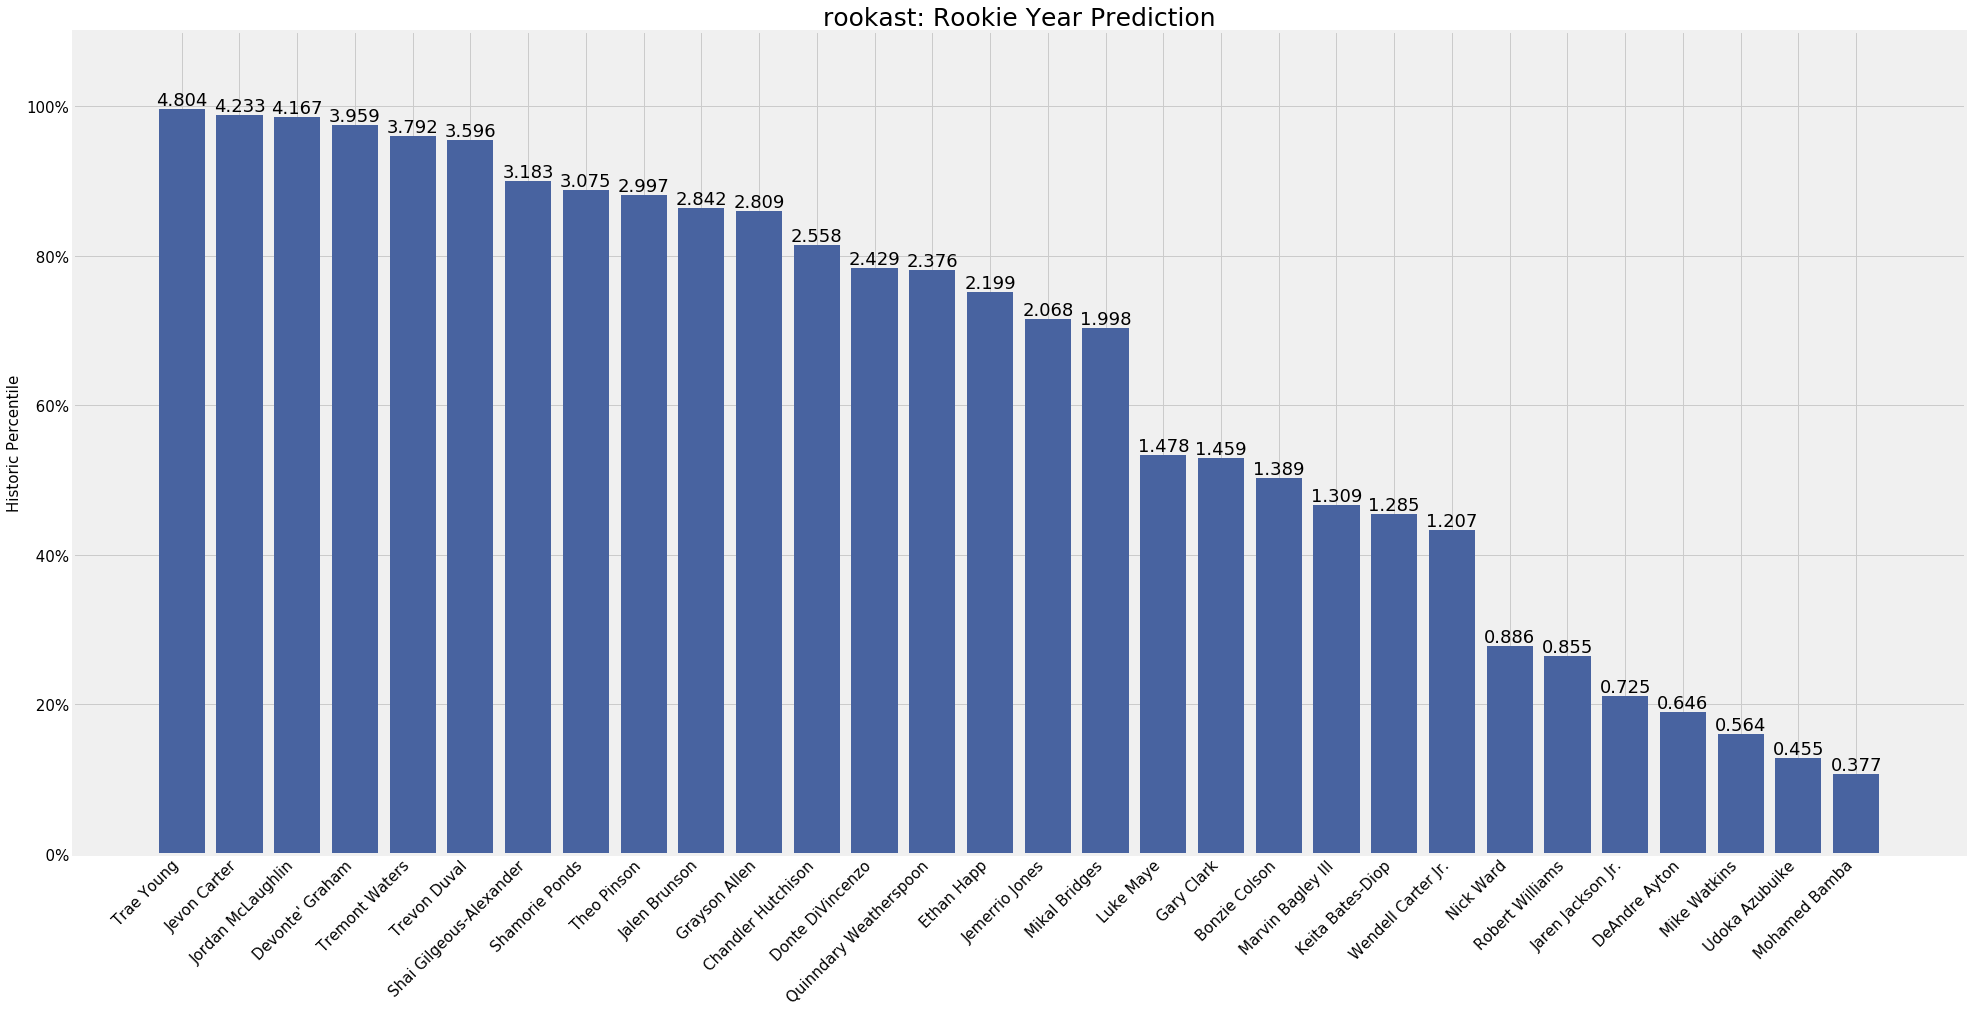

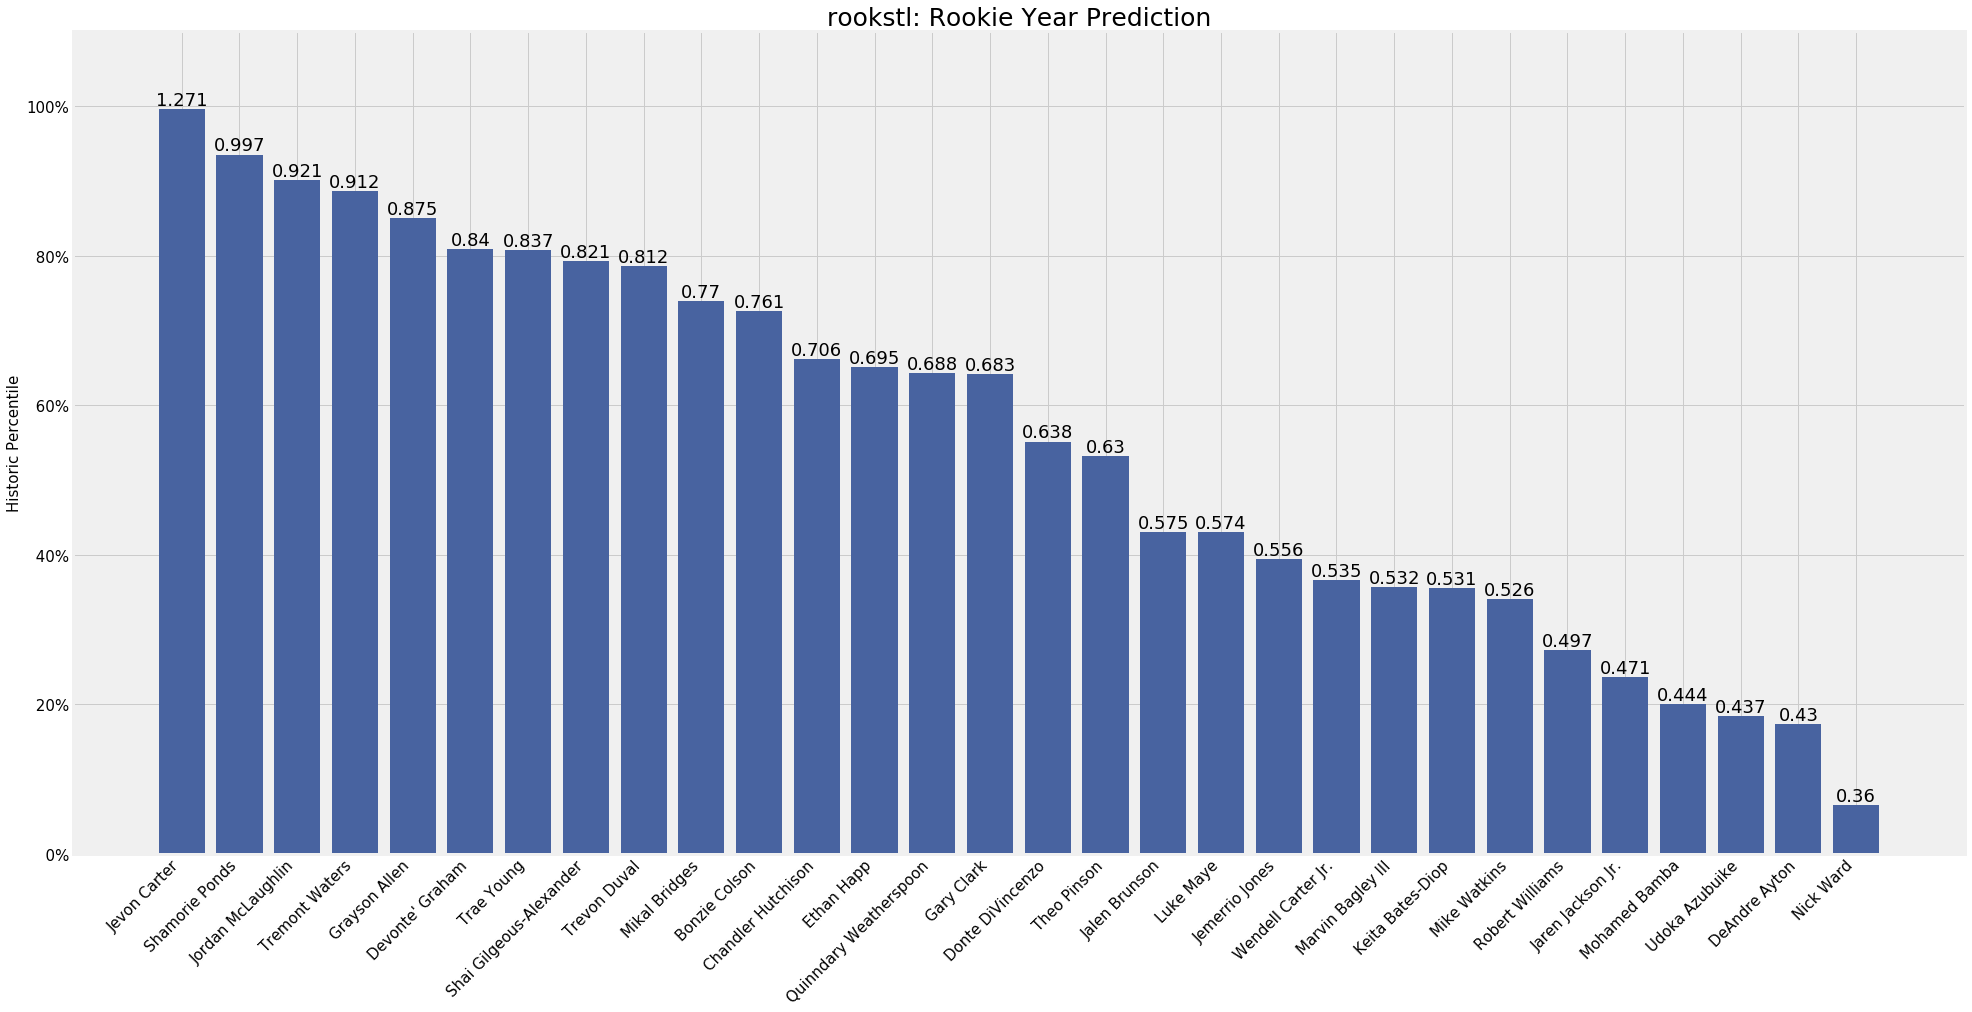

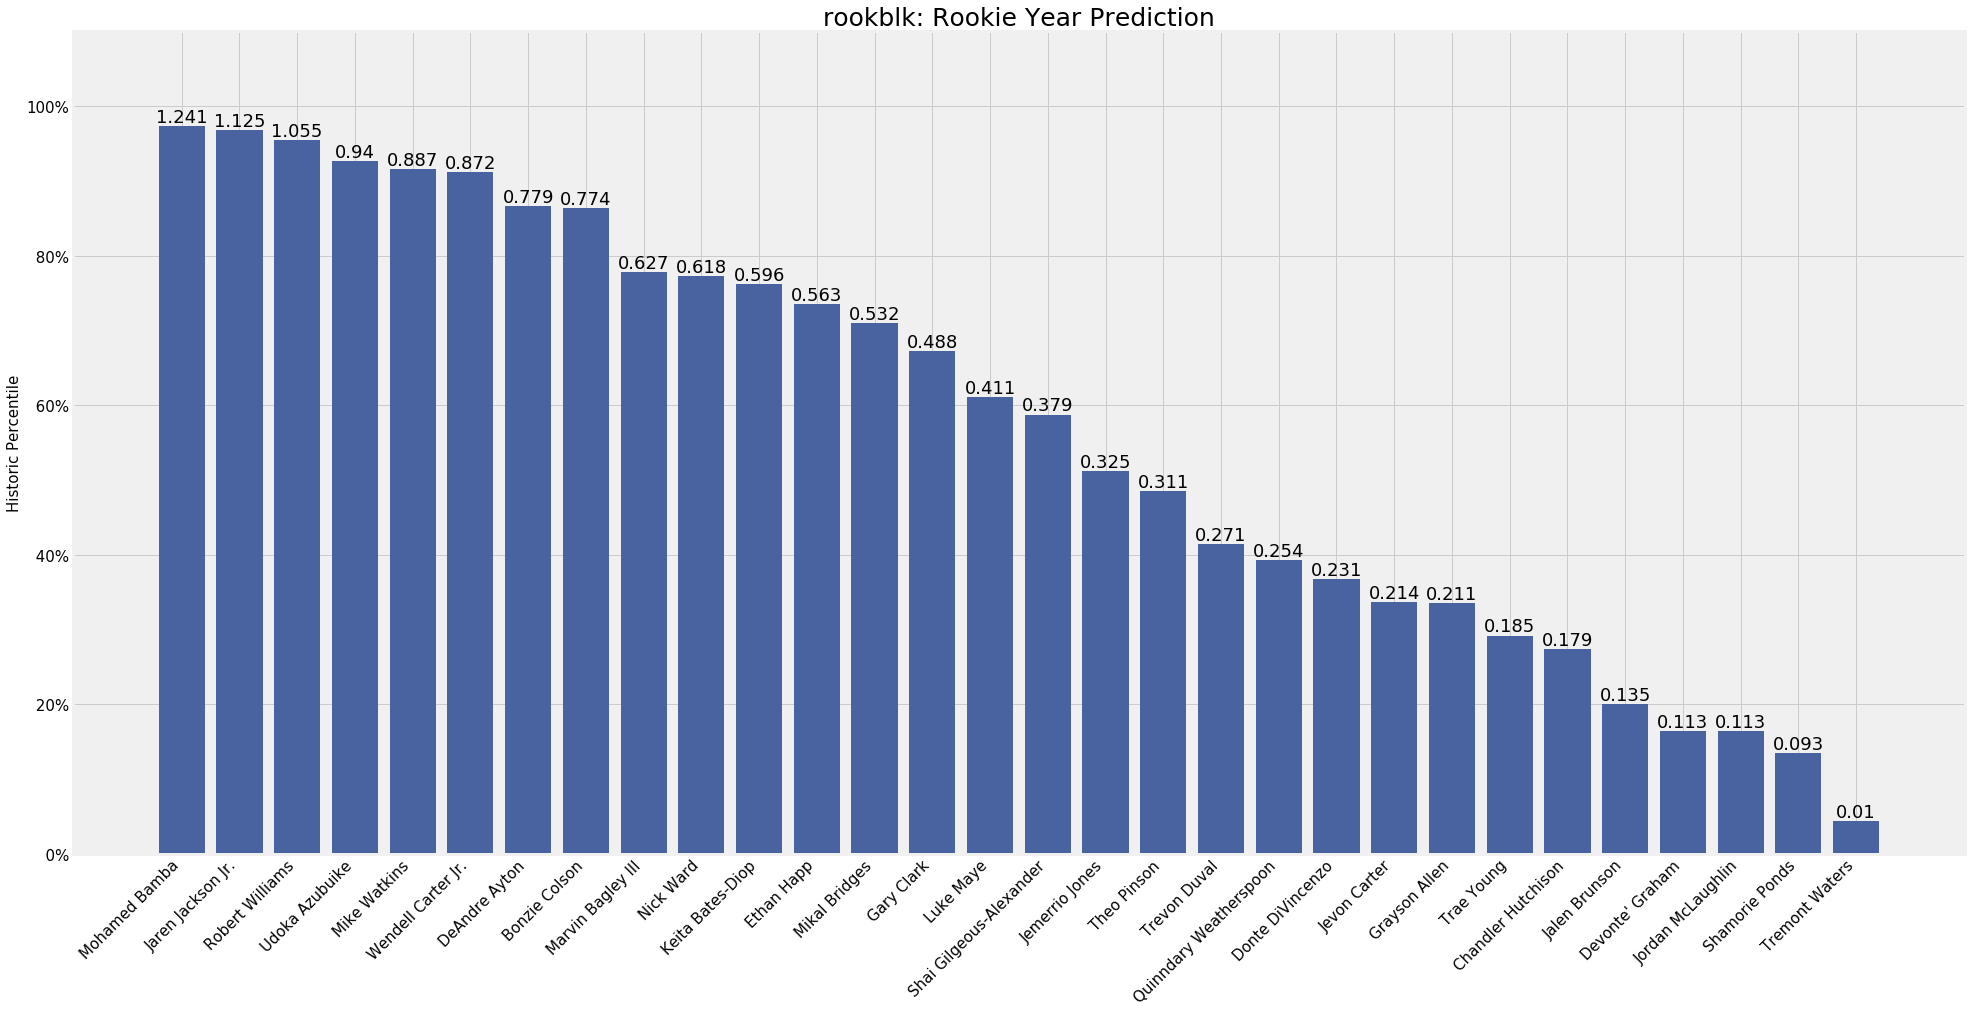

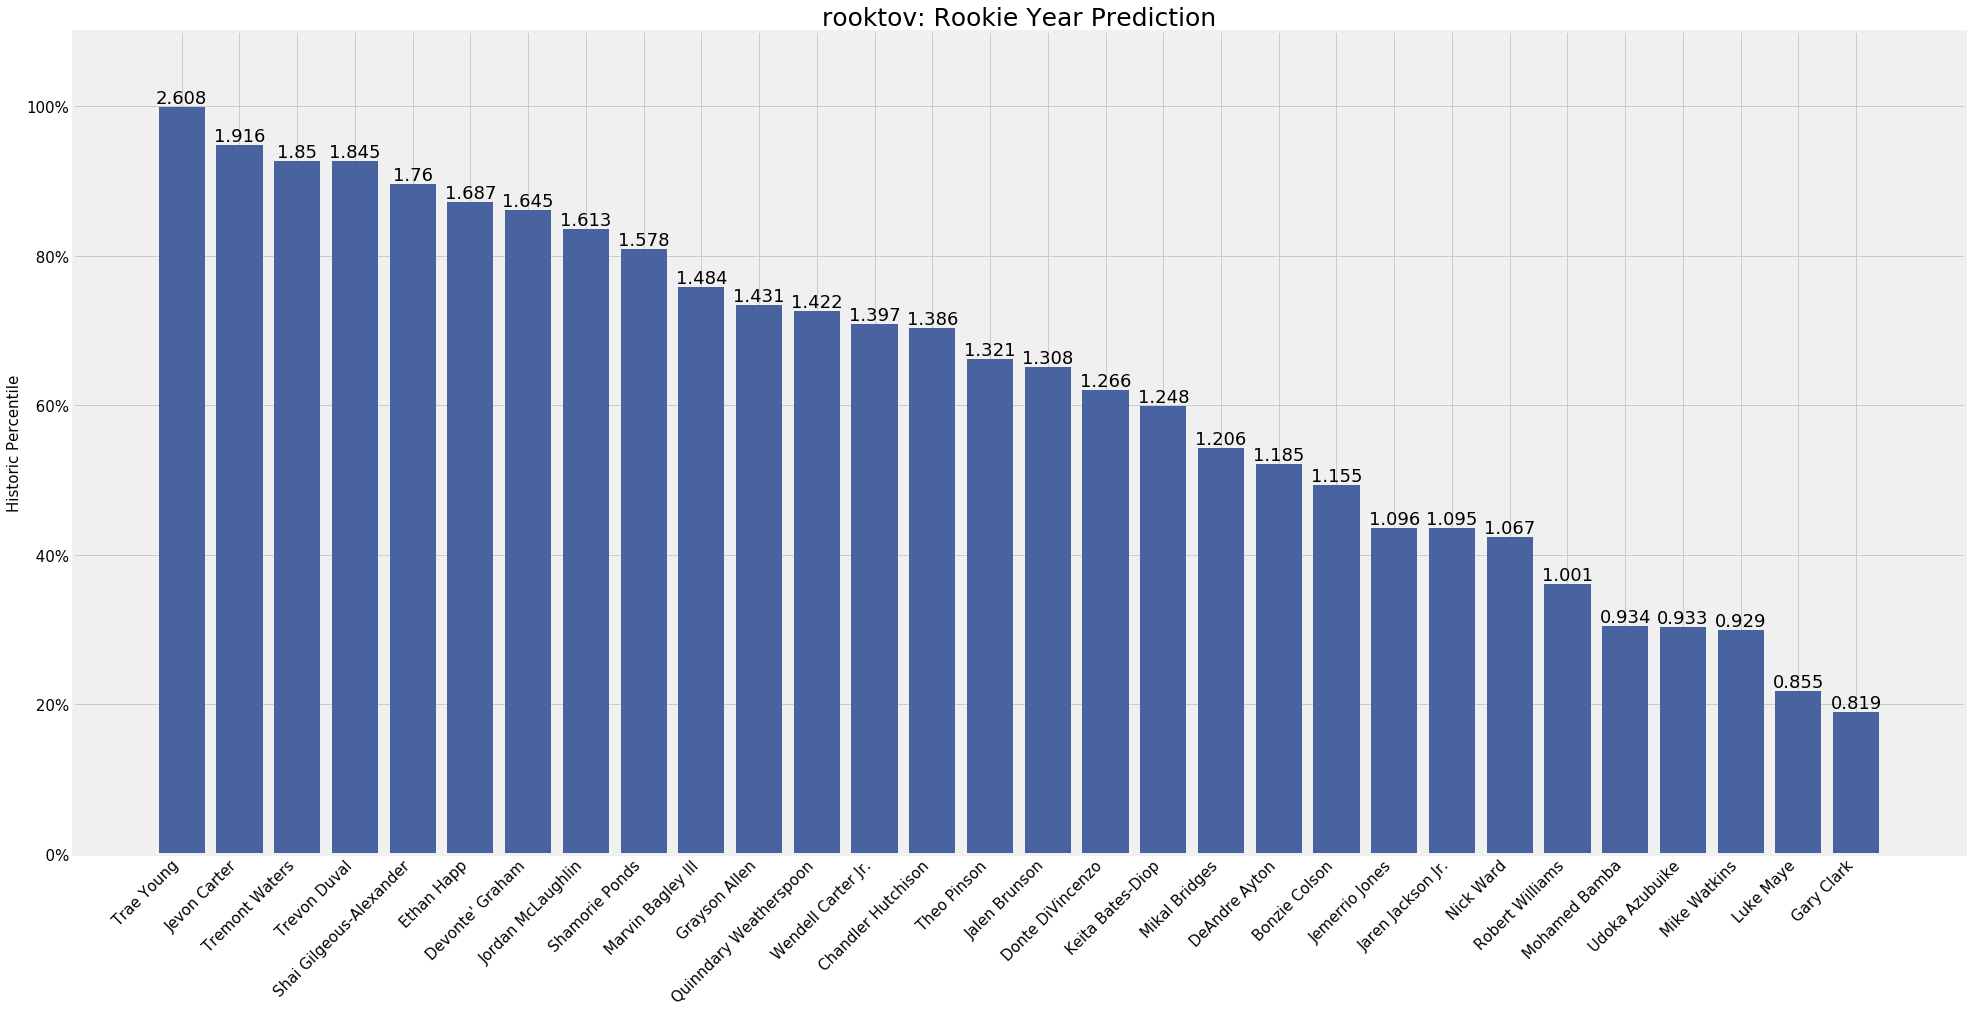

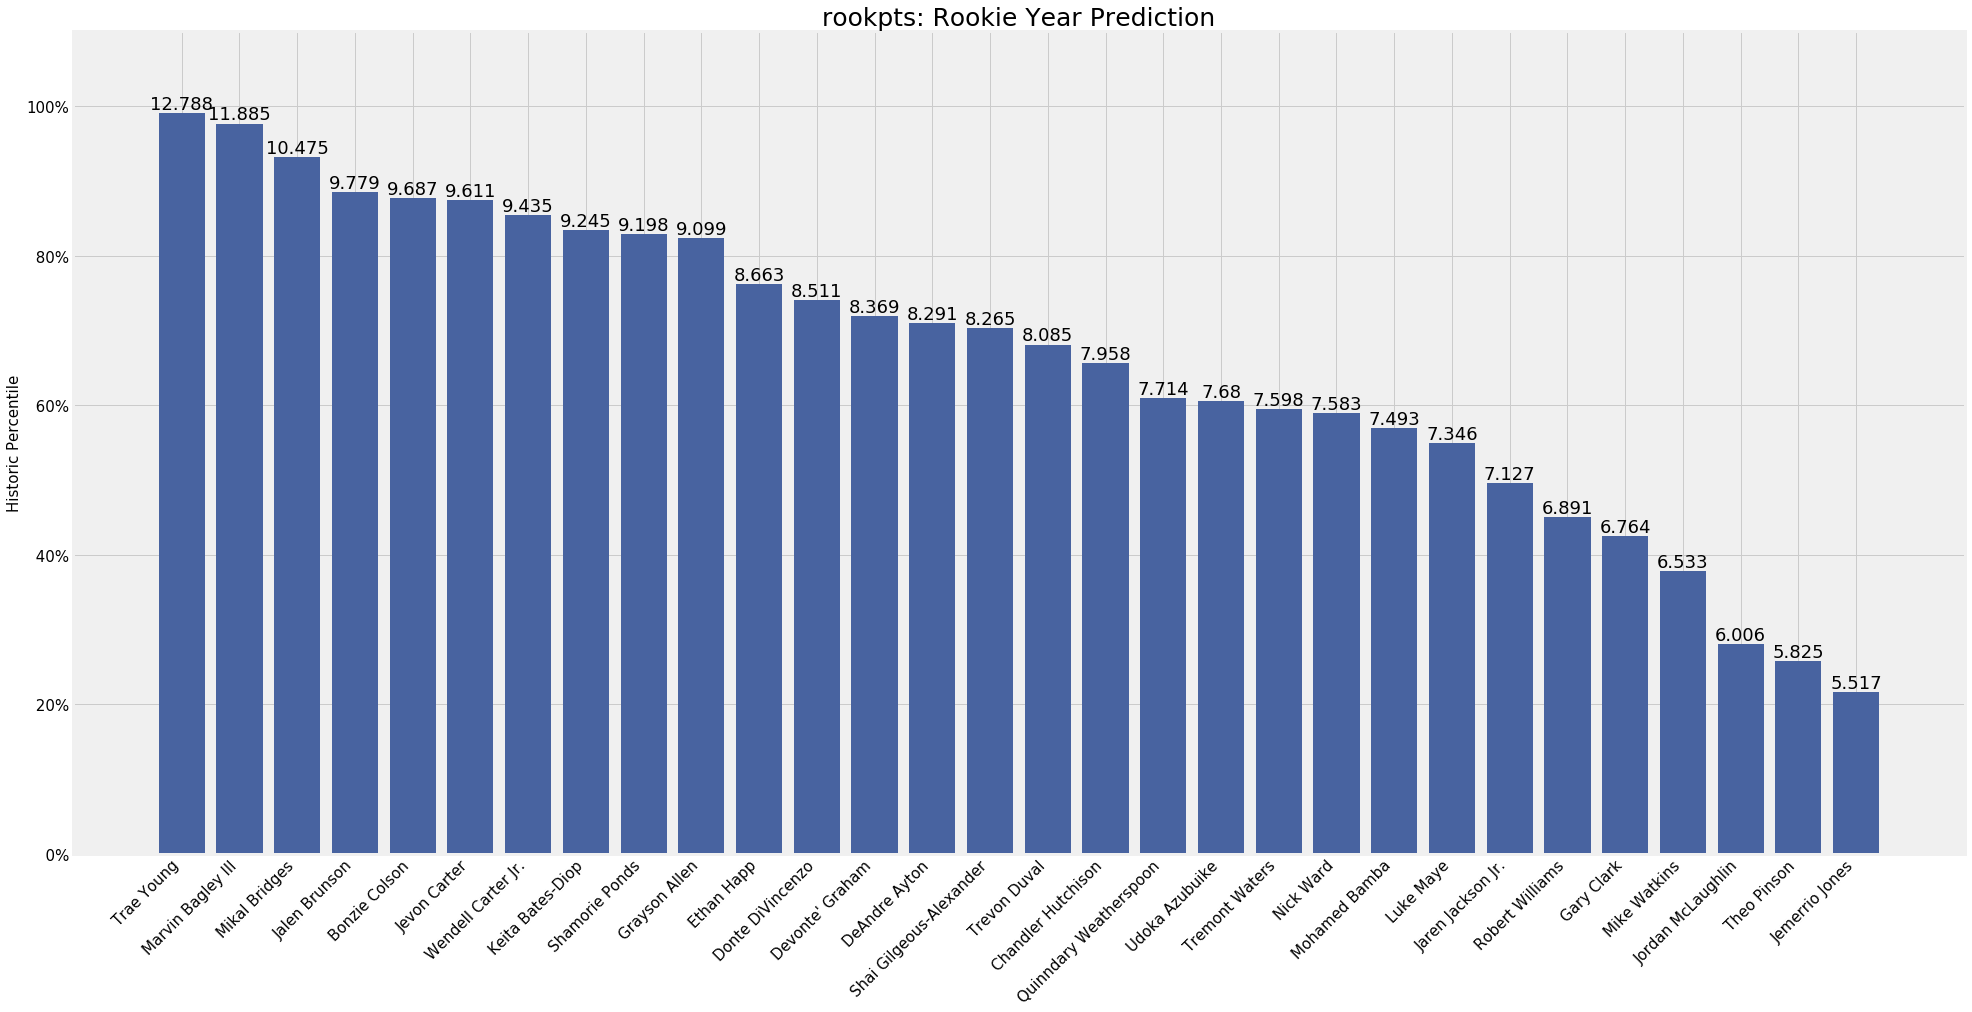

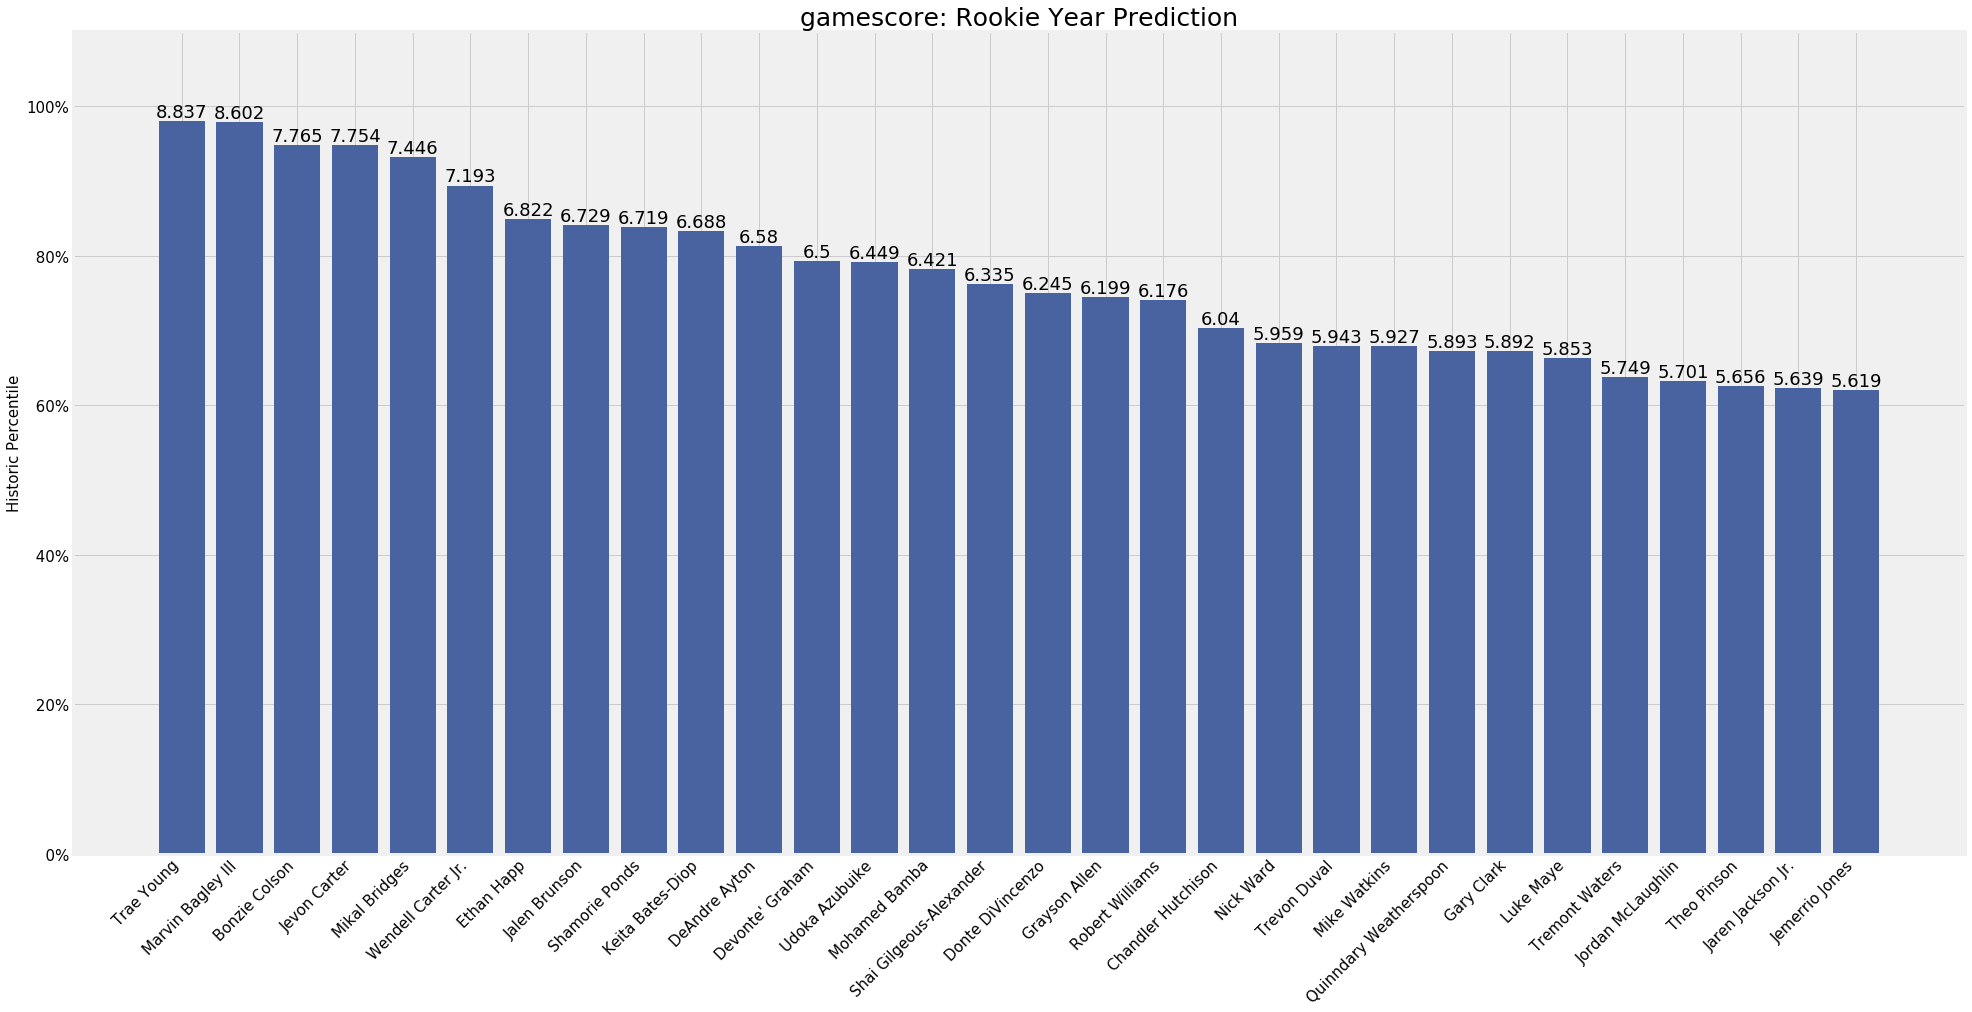

In [64]:
predDf = df2018Clean[df2018Clean.player.isin(top30Players)]
for col in yCols:
    numPlayers = 30
    fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(30, 15))
    plt.tight_layout(pad=12)
    players = predDf.player
    fig.set_facecolor('white')
    curr_i = col
    newDf = predDf.sort_values('pred_' + curr_i,ascending=False).head(numPlayers)
    ax.fontsize = 20
    ax.bar(range(numPlayers), newDf['pred_' + curr_i +'percentile'], label=newDf['pred_' + curr_i],color='#4863A0')
    
    ax.set_xticklabels(list(newDf.player),rotation=45,fontsize=15,ha="right")
    ax.set_xticks(range(numPlayers))
    ax.set_ylim((0,1.1))
    ax.set_ylabel('Historic Percentile',fontsize=15)
    ax.set_title(f'{curr_i}: Rookie Year Prediction', color='black',fontsize=25)
#     for i, v in enumerate(newDf['pred_' + curr_i]):
#         ax.text(v, i, '  ' + str(round(v,3)), color='black',fontsize=20)
    
    vals = ax.get_yticks()
    ax.set_yticklabels(['{:3.0f}%'.format(x*100) for x in vals],fontsize=15,ha="right")
    
    rects = ax.patches
    # Make some labels.
    labels = list(round(newDf['pred_' + curr_i],3))

    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height, label,
                ha='center', va='bottom',fontsize=18)
    print(curr_i)
    fig.savefig(curr_i + '_2018-Prediction.png')

In [65]:
def plot_player_stats(playerName, theDf):
    predDf = theDf[theDf.player==playerName]
    predictionCols = []
    statVals = []
    statPerc = []
    for colName in predDf.columns:
        if 'pred_' in colName and 'percentile' not in colName:
            predictionCols.append(colName)
            statVals.append(round(float(predDf[colName]),3))
            statPerc.append(float(predDf[colName+'percentile']))

    fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(30, 15))
    fig.set_facecolor('white')
    ax.fontsize = 20
#     print(statPerc)
    ax.bar(range(len(predictionCols)), statPerc,color='#4863A0')

    ax.set_xticklabels(predictionCols,rotation=45,fontsize=15,ha="right")
    ax.set_xticks(range(len(predictionCols)))
    ax.set_ylim((0,1.1))
    ax.set_ylabel('Historic Percentile',fontsize=15)
    ax.set_title(f'{playerName}: Rookie Year Predictions', color='black',fontsize=25)
    #     for i, v in enumerate(newDf['pred_' + curr_i]):
    #         ax.text(v, i, '  ' + str(round(v,3)), color='black',fontsize=20)

    vals = ax.get_yticks()
    ax.set_yticklabels(['{:3.0f}%'.format(x*100) for x in vals],fontsize=15,ha="right")

    rects = ax.patches
    # Make some labels.
    labels = list(statVals)

    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height, label,
                ha='center', va='bottom',fontsize=18)

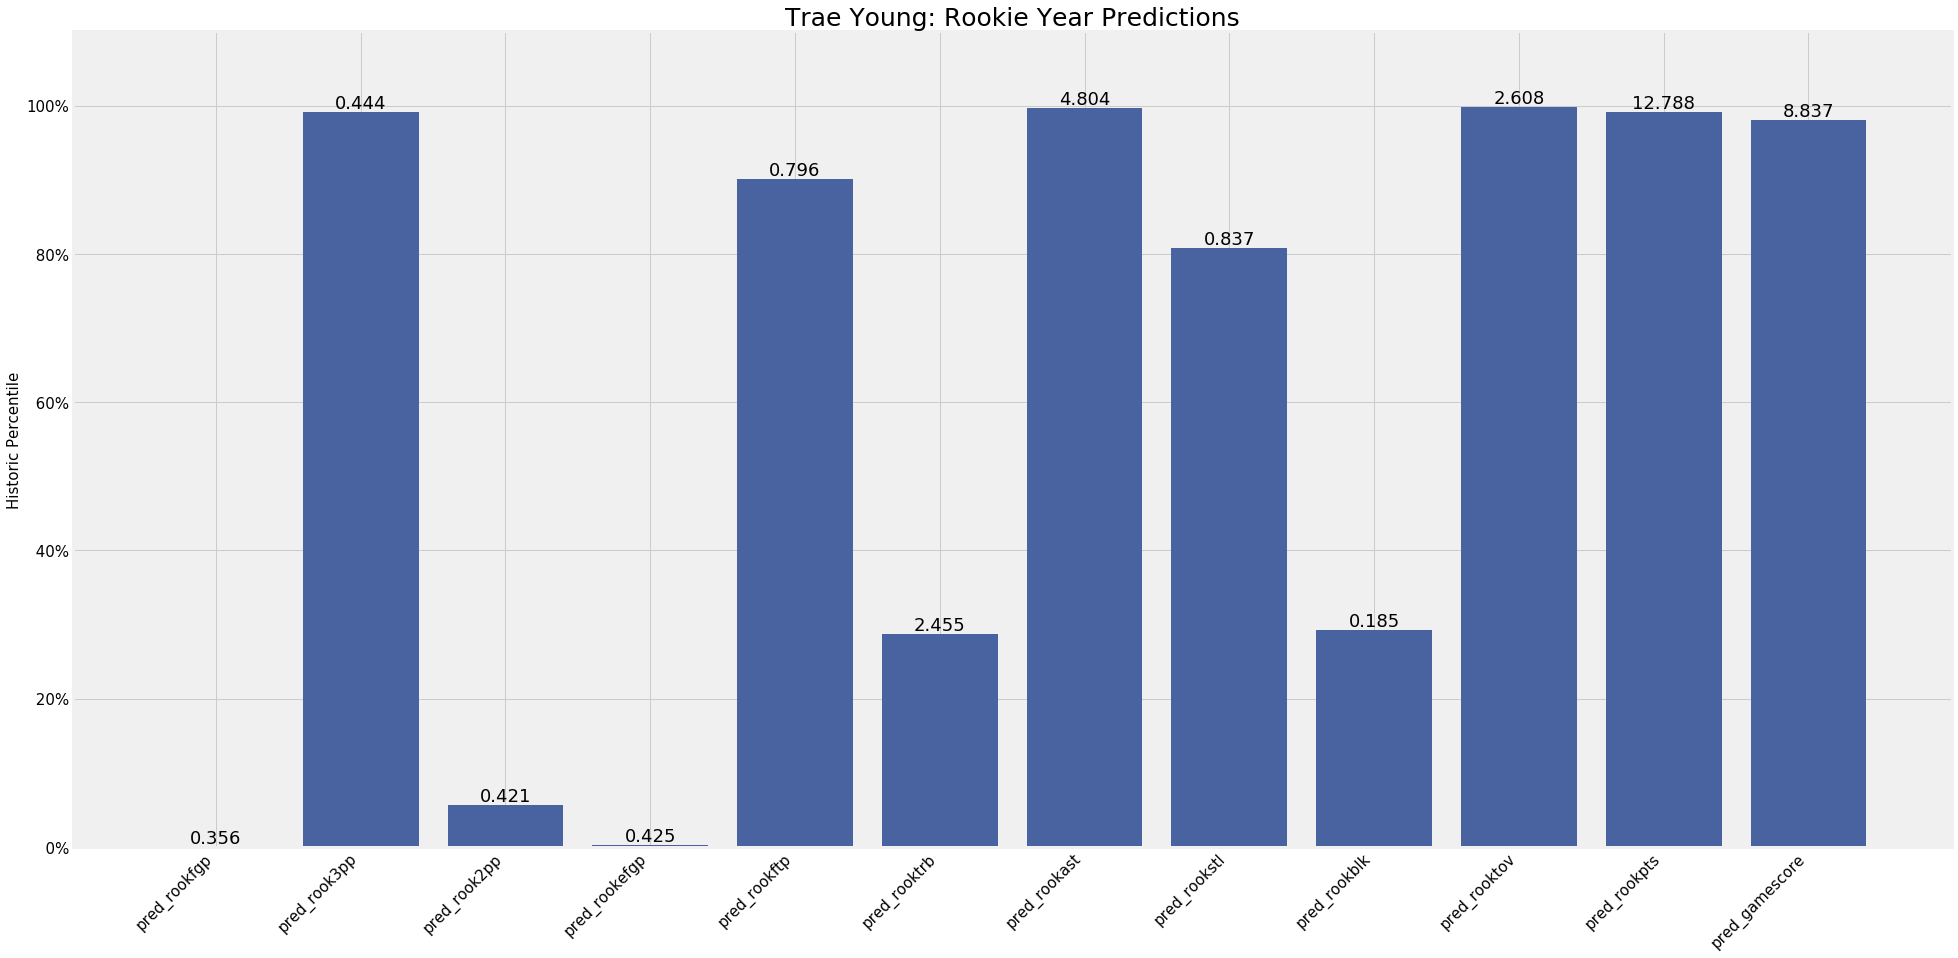

In [66]:
plot_player_stats('Trae Young', df2018Clean)

In [67]:
indivStatCols = xCols[:24]

In [68]:
normDf = plotDf[['player'] + indivStatCols].copy()

In [69]:
stdevs = []
means = []
for col in normDf.columns[1:]:
    stdevs.append(normDf[col].std())
    means.append(normDf[col].mean())

In [70]:
zScore2018Df = df2018Clean[['player','playerlink'] + indivStatCols].copy()
for i in range(len(indivStatCols)):
    col = indivStatCols[i]
    zScore2018Df[col] = zScore2018Df[col] - means[i]
    zScore2018Df[col] = zScore2018Df[col] / stdevs[i]
    
    normDf[col] = normDf[col] - means[i]
    normDf[col] = normDf[col] / stdevs[i]

In [71]:
mostSimilarDf = pd.DataFrame(zScore2018Df[['player','playerlink']].copy())
mostSimilarDf['player1'] = ''
mostSimilarDf['player2'] = ''
mostSimilarDf['player3'] = ''
mostSimilarDf['player4'] = ''
mostSimilarDf['player5'] = ''
mostSimilarDf['score1'] = ''
mostSimilarDf['score2'] = ''
mostSimilarDf['score3'] = ''
mostSimilarDf['score4'] = ''
mostSimilarDf['score5'] = ''

In [72]:
simScores = []
eucDistDf = pd.DataFrame()
eucDistDf['player'] = normDf.player
for idx, vals  in zScore2018Df.iterrows():
    holderDf = normDf.copy()
    for col in indivStatCols:
        holderDf[col] = (holderDf[col] - float(vals[col]))**2
    eucDistDf['sum'] = holderDf.sum(axis=1)**.5
    simScores.extend(list(eucDistDf['sum']))
    similar =  list(eucDistDf.sort_values('sum')['player'].head(5))
    similarScore = list(eucDistDf.sort_values('sum')['sum'].head(5))
    for i in range(len(similar)):
        mostSimilarDf.loc[mostSimilarDf.player == vals['player'],'player' + str(i+1)] = similar[i]
        mostSimilarDf.loc[mostSimilarDf.player == vals['player'],'score' + str(i+1)] = similarScore[i]
simScores.sort()

In [73]:
pctIncrement = 1/len(simScores)
for i in range(1,6):
        mostSimilarDf['score' + str(i) + '_rank'] = \
        1 - (pd.Series(simScores).searchsorted(mostSimilarDf['score' + str(i)]))*pctIncrement

In [74]:
draft2018SimilarDf = pd.merge(df2018Clean,mostSimilarDf,how='left',on='playerlink').copy()

In [75]:
draft2018SimilarDf.to_csv('draft-2018-projections.csv')